In [1]:
!pip install pandas openpyxl

In [2]:
pip install --upgrade openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

file_path_1 = '/Users/rishithagantyala/Desktop/SUBGRADE.xlsx' 
file_path_2 = '/Users/rishithagantyala/Desktop/BTP/DATA/combined_data.xlsx'


PL_df = pd.read_excel(file_path_1, sheet_name='PL,LL')
MDD_df = pd.read_excel(file_path_1, sheet_name='MDD')
Moist_content_df = pd.read_excel(file_path_1, sheet_name='Moist content')
print(Moist_content_df.head())

print(PL_df.head())
print(MDD_df.head())
print(Moist_content_df.head())

   STATE_CODE STATE_CODE_EXP SHRP_ID LOC_NO SAMPLE_NO  MOIST_CONTENT
0          48          Texas    0001    BA2      MS02      18.700001
1          48          Texas    0001    BA1      MS01      14.800000
2          10       Delaware    0102     B2      MS02       8.400000
3          10       Delaware    0107     B1      MS01       9.800000
4          39           Ohio    0107     B3      MS03      11.500000
   STATE_CODE STATE_CODE_EXP SHRP_ID LOC_NO SAMPLE_NO  LIQUID_LIMIT  \
0          19           Iowa    0605   TP-1     BS-55            26   
1          19           Iowa    0604   TP-2     BS-56            34   
2          19           Iowa    0606   TP-3     BS-57            28   
3          48          Texas    0001    BA*      BS**            35   
4           1        Alabama    1001    BA*      BS**            34   

   PLASTIC_LIMIT  PLASTICITY_INDEX  
0             16                10  
1             16                18  
2             15                13  
3          

In [4]:
combined_df = pd.merge(PL_df, MDD_df, on=['STATE_CODE','SHRP_ID','LOC_NO','SAMPLE_NO'], how='inner')
print("\nCombined DataFrame:")
print(combined_df.head())


Combined DataFrame:
   STATE_CODE STATE_CODE_EXP_x SHRP_ID LOC_NO SAMPLE_NO  LIQUID_LIMIT  \
0          19             Iowa    0605   TP-1     BS-55            26   
1          19             Iowa    0604   TP-2     BS-56            34   
2          19             Iowa    0606   TP-3     BS-57            28   
3          48            Texas    0001    BA*      BS**            35   
4          13          Georgia    1001    BA*      BS**            43   

   PLASTIC_LIMIT  PLASTICITY_INDEX STATE_CODE_EXP_y  MAX_LAB_DRY_DENSITY  \
0             16                10             Iowa                121.0   
1             16                18             Iowa                118.0   
2             15                13             Iowa                118.0   
3             17                18            Texas                116.0   
4             26                17          Georgia                118.0   

   OPTIMUM_LAB_MOISTURE  
0                  12.0  
1                  13.0  
2    

In [5]:
combined_df.to_excel(file_path_2, index=False, sheet_name='CombinedData')


In [6]:
Sieve_1_df = pd.read_excel(file_path_1, sheet_name='Sieve_1')
Sieve_2_df = pd.read_excel(file_path_1, sheet_name='Sieve_2')
print(Sieve_1_df.head())
print(Sieve_2_df.head())

   STATE_CODE STATE_CODE_EXP SHRP_ID LOC_NO SAMPLE_NO  THREE_PASSING  \
0          48          Texas    0001    TP1      BS55             96   
1          48          Texas    0001    BA*      BS**            100   
2           1        Alabama    0101     B6      BS06            100   
3          12        Florida    0101     B5      BS05            100   
4          32         Nevada    0101    B26      BS01            100   

   TWO_PASSING  ONE_AND_HALF_PASSING  ONE_PASSING  THREE_FOURTHS_PASSING  \
0    84.000000             82.000000    74.000000              68.000000   
1   100.000000             99.000000    98.000000              97.000000   
2   100.000000            100.000000   100.000000             100.000000   
3    98.199997             95.900002    94.800003              91.800003   
4   100.000000            100.000000   100.000000             100.000000   

   ONE_HALF_PASSING  THREE_EIGHTHS_PASSING  NO_4_PASSING  NO_10_PASSING  \
0         62.000000              58

In [7]:
combined_2_df = pd.merge(Sieve_1_df, Sieve_2_df, on=['STATE_CODE','SHRP_ID','LOC_NO','SAMPLE_NO'], how='inner')
print("\nCombined 2 DataFrame:")
print(combined_2_df.head())


Combined 2 DataFrame:
   STATE_CODE STATE_CODE_EXP_x SHRP_ID LOC_NO SAMPLE_NO  THREE_PASSING  \
0          48            Texas    0001    TP1      BS55             96   
1          48            Texas    0001    BA*      BS**            100   
2           1          Alabama    0101     B6      BS06            100   
3          12          Florida    0101     B5      BS05            100   
4          32           Nevada    0101    B26      BS01            100   

   TWO_PASSING  ONE_AND_HALF_PASSING  ONE_PASSING  THREE_FOURTHS_PASSING  ...  \
0    84.000000             82.000000    74.000000              68.000000  ...   
1   100.000000             99.000000    98.000000              97.000000  ...   
2   100.000000            100.000000   100.000000             100.000000  ...   
3    98.199997             95.900002    94.800003              91.800003  ...   
4   100.000000            100.000000   100.000000             100.000000  ...   

   NO_200_PASSING  STATE_CODE_EXP_y   HYDRO_0

In [8]:
with pd.ExcelWriter(file_path_2, engine='openpyxl', mode='a') as writer:
    combined_2_df.to_excel(writer, index=False, sheet_name='CombinedData2')

In [9]:
!pip install pandas scikit-learn openpyxl



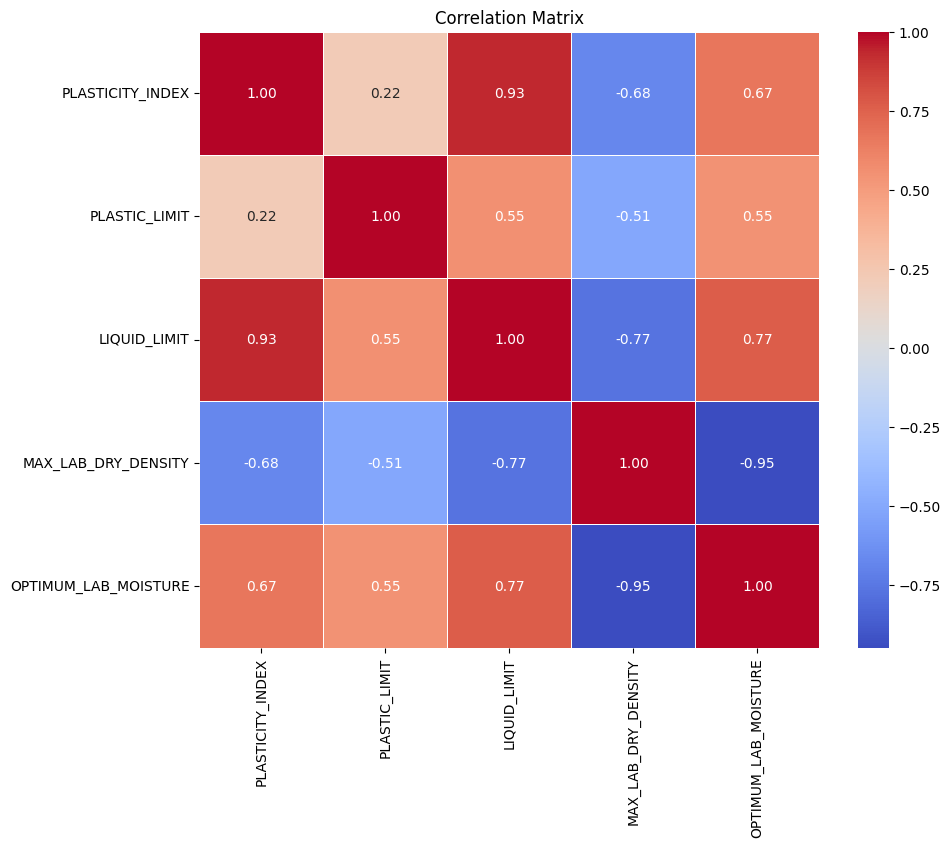

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file_path = '/Users/rishithagantyala/Desktop/BTP/DATA/combined_data.xlsx'

combined_df = pd.read_excel(file_path, sheet_name='CombinedData')

columns_of_interest = [ 'PLASTICITY_INDEX','PLASTIC_LIMIT','LIQUID_LIMIT',  'MAX_LAB_DRY_DENSITY', 'OPTIMUM_LAB_MOISTURE']
selected_df = combined_df[columns_of_interest]

corr_matrix = selected_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [11]:
print(combined_df.head())

   STATE_CODE STATE_CODE_EXP_x SHRP_ID LOC_NO SAMPLE_NO  LIQUID_LIMIT  \
0          19             Iowa    0605   TP-1     BS-55            26   
1          19             Iowa    0604   TP-2     BS-56            34   
2          19             Iowa    0606   TP-3     BS-57            28   
3          48            Texas    0001    BA*      BS**            35   
4          13          Georgia    1001    BA*      BS**            43   

   PLASTIC_LIMIT  PLASTICITY_INDEX STATE_CODE_EXP_y  MAX_LAB_DRY_DENSITY  \
0             16                10             Iowa                121.0   
1             16                18             Iowa                118.0   
2             15                13             Iowa                118.0   
3             17                18            Texas                116.0   
4             26                17          Georgia                118.0   

   OPTIMUM_LAB_MOISTURE  
0                    12  
1                    13  
2                    12  


In [12]:
print(combined_2_df.head())

   STATE_CODE STATE_CODE_EXP_x SHRP_ID LOC_NO SAMPLE_NO  THREE_PASSING  \
0          48            Texas    0001    TP1      BS55             96   
1          48            Texas    0001    BA*      BS**            100   
2           1          Alabama    0101     B6      BS06            100   
3          12          Florida    0101     B5      BS05            100   
4          32           Nevada    0101    B26      BS01            100   

   TWO_PASSING  ONE_AND_HALF_PASSING  ONE_PASSING  THREE_FOURTHS_PASSING  ...  \
0    84.000000             82.000000    74.000000              68.000000  ...   
1   100.000000             99.000000    98.000000              97.000000  ...   
2   100.000000            100.000000   100.000000             100.000000  ...   
3    98.199997             95.900002    94.800003              91.800003  ...   
4   100.000000            100.000000   100.000000             100.000000  ...   

   NO_200_PASSING  STATE_CODE_EXP_y   HYDRO_02  HYDRO_002  HYDRO_001

In [13]:
combined_3_df = pd.merge(combined_df, combined_2_df, on=['STATE_CODE','SHRP_ID','LOC_NO','SAMPLE_NO'], how='right')
print("\nCombined 3 DataFrame:")
print(combined_3_df.head())


Combined 3 DataFrame:
   STATE_CODE STATE_CODE_EXP_x_x SHRP_ID LOC_NO SAMPLE_NO  LIQUID_LIMIT  \
0          48              Texas    0001    TP1      BS55          28.0   
1          48              Texas    0001    BA*      BS**          35.0   
2           1            Alabama    0101     B6      BS06          49.0   
3          12                NaN    0101     B5      BS05           NaN   
4          32                NaN    0101    B26      BS01           NaN   

   PLASTIC_LIMIT  PLASTICITY_INDEX STATE_CODE_EXP_y_x  MAX_LAB_DRY_DENSITY  \
0           18.0              10.0              Texas                120.0   
1           17.0              18.0              Texas                116.0   
2           35.0              14.0            Alabama                104.0   
3            NaN               NaN                NaN                  NaN   
4            NaN               NaN                NaN                  NaN   

   ...  NO_200_PASSING STATE_CODE_EXP_y_y   HYDRO_02  HYD

In [14]:
with pd.ExcelWriter(file_path_2, engine='openpyxl', mode='a') as writer:
    combined_3_df.to_excel(writer, index=False, sheet_name='CombinedData3')

In [15]:
print(combined_3_df.head())

   STATE_CODE STATE_CODE_EXP_x_x SHRP_ID LOC_NO SAMPLE_NO  LIQUID_LIMIT  \
0          48              Texas    0001    TP1      BS55          28.0   
1          48              Texas    0001    BA*      BS**          35.0   
2           1            Alabama    0101     B6      BS06          49.0   
3          12                NaN    0101     B5      BS05           NaN   
4          32                NaN    0101    B26      BS01           NaN   

   PLASTIC_LIMIT  PLASTICITY_INDEX STATE_CODE_EXP_y_x  MAX_LAB_DRY_DENSITY  \
0           18.0              10.0              Texas                120.0   
1           17.0              18.0              Texas                116.0   
2           35.0              14.0            Alabama                104.0   
3            NaN               NaN                NaN                  NaN   
4            NaN               NaN                NaN                  NaN   

   ...  NO_200_PASSING STATE_CODE_EXP_y_y   HYDRO_02  HYDRO_002  HYDRO_001  \
0 

In [16]:
ism_df = pd.read_excel(file_path_1, sheet_name='ISM')
combined_3_df = pd.read_excel(file_path_2, sheet_name='CombinedData3')
print(ism_df.head())

   STATE_CODE STATE_CODE_EXP SHRP_ID LOC_NO  DEPTH_TOP_STRATA  ISD_DRY_AVG  \
0          48          Texas    0001    TP1         19.700001   123.279999   
1          48          Texas    0001    TP1          2.700000   131.449997   
2          10       Delaware    0101    T69         16.000000   126.599998   
3          10       Delaware    0101    T70         16.000000   127.500000   
4          10       Delaware    0101    T71         16.000000   124.500000   

   ISMC_AVG  
0     11.20  
1      7.98  
2      7.45  
3      9.00  
4      6.30  


In [17]:
combined_4_df = pd.merge(ism_df, combined_3_df, on=['STATE_CODE', 'SHRP_ID', 'LOC_NO'], how='right')
print("\nCombined 4 DataFrame:")
print(combined_4_df.head())


Combined 4 DataFrame:
   STATE_CODE STATE_CODE_EXP SHRP_ID LOC_NO  DEPTH_TOP_STRATA  ISD_DRY_AVG  \
0          48          Texas    0001    TP1         19.700001   123.279999   
1          48          Texas    0001    TP1          2.700000   131.449997   
2          48            NaN    0001    BA*               NaN          NaN   
3           1            NaN    0101     B6               NaN          NaN   
4          12            NaN    0101     B5               NaN          NaN   

   ISMC_AVG STATE_CODE_EXP_x_x SAMPLE_NO  LIQUID_LIMIT  ...  NO_200_PASSING  \
0     11.20              Texas      BS55          28.0  ...       28.000000   
1      7.98              Texas      BS55          28.0  ...       28.000000   
2       NaN              Texas      BS**          35.0  ...       61.299999   
3       NaN            Alabama      BS06          49.0  ...       68.000000   
4       NaN                NaN      BS05           NaN  ...       13.500000   

   STATE_CODE_EXP_y_y   HYDRO_02 

In [18]:
with pd.ExcelWriter(file_path_2, engine='openpyxl', mode='a') as writer:
    combined_4_df.to_excel(writer, index=False, sheet_name='CombinedData4')

In [19]:
print(combined_4_df.head())

   STATE_CODE STATE_CODE_EXP SHRP_ID LOC_NO  DEPTH_TOP_STRATA  ISD_DRY_AVG  \
0          48          Texas    0001    TP1         19.700001   123.279999   
1          48          Texas    0001    TP1          2.700000   131.449997   
2          48            NaN    0001    BA*               NaN          NaN   
3           1            NaN    0101     B6               NaN          NaN   
4          12            NaN    0101     B5               NaN          NaN   

   ISMC_AVG STATE_CODE_EXP_x_x SAMPLE_NO  LIQUID_LIMIT  ...  NO_200_PASSING  \
0     11.20              Texas      BS55          28.0  ...       28.000000   
1      7.98              Texas      BS55          28.0  ...       28.000000   
2       NaN              Texas      BS**          35.0  ...       61.299999   
3       NaN            Alabama      BS06          49.0  ...       68.000000   
4       NaN                NaN      BS05           NaN  ...       13.500000   

   STATE_CODE_EXP_y_y   HYDRO_02  HYDRO_002  HYDRO_001 G

In [20]:
SG_df = pd.read_excel(file_path_1, sheet_name='Specific gravity')

In [21]:
print(SG_df.head())

   STATE_CODE STATE_CODE_EXP SHRP_ID SAMPLE_NO  SPEC_GRAVITY  TEST_NO
0          48          Texas    0001      BS**         2.684        1
1          48          Texas    0001      BS55         2.706        2
2          12        Florida    0102     BS302         2.730        1
3          12        Florida    0102     BS301         2.738        1
4          12        Florida    0102     BS303         2.717        2


In [22]:
combined_5_df = pd.merge(SG_df, combined_4_df, on=['STATE_CODE', 'SHRP_ID', 'SAMPLE_NO'], how='right')
print("\nCombined 5 DataFrame:")
print(combined_5_df.head())


Combined 5 DataFrame:
   STATE_CODE STATE_CODE_EXP_x SHRP_ID SAMPLE_NO  SPEC_GRAVITY  TEST_NO  \
0          48            Texas    0001      BS55         2.706      2.0   
1          48            Texas    0001      BS55         2.706      2.0   
2          48            Texas    0001      BS**         2.684      1.0   
3           1              NaN    0101      BS06           NaN      NaN   
4          12              NaN    0101      BS05           NaN      NaN   

  STATE_CODE_EXP_y LOC_NO  DEPTH_TOP_STRATA  ISD_DRY_AVG  ...  NO_200_PASSING  \
0            Texas    TP1         19.700001   123.279999  ...       28.000000   
1            Texas    TP1          2.700000   131.449997  ...       28.000000   
2              NaN    BA*               NaN          NaN  ...       61.299999   
3              NaN     B6               NaN          NaN  ...       68.000000   
4              NaN     B5               NaN          NaN  ...       13.500000   

  STATE_CODE_EXP_y_y   HYDRO_02  HYDRO_

In [23]:
with pd.ExcelWriter(file_path_2, engine='openpyxl', mode='a') as writer:
    combined_5_df.to_excel(writer, index=False, sheet_name='CombinedData5')

In [24]:
MR_df = pd.read_excel(file_path_1, sheet_name='MR')
print(MR_df.head())

   STATE_CODE STATE_CODE_EXP SHRP_ID LOC_NO SAMPLE_NO  CON_PRESSURE  \
0           1        Alabama    0101     B6      BS06          27.6   
1           1        Alabama    0101     B6      BS06          13.8   
2           1        Alabama    0101     B6      BS06          13.8   
3           1        Alabama    0101     B6      BS06          27.6   
4           1        Alabama    0101     B6      BS06          27.6   

   NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  RES_MOD_AVG  
0             13.800000        0.000177           70  
1             13.800000        0.000183           68  
2             68.900002        0.001062           59  
3             27.600000        0.000350           71  
4             55.099998        0.000764           66  


In [25]:
df = pd.read_excel(file_path_1, sheet_name='MR')
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8699 entries, 0 to 8698
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   STATE_CODE            8699 non-null   int64  
 1   STATE_CODE_EXP        8699 non-null   object 
 2   SHRP_ID               8699 non-null   object 
 3   LOC_NO                8699 non-null   object 
 4   SAMPLE_NO             8699 non-null   object 
 5   CON_PRESSURE          8699 non-null   float64
 6   NOM_MAX_AXIAL_STRESS  8699 non-null   float64
 7   RES_STRAIN_AVG        8699 non-null   float64
 8   RES_MOD_AVG           8699 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 611.8+ KB
None
        STATE_CODE  CON_PRESSURE  NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  \
count  8699.000000   8699.000000           8699.000000     8699.000000   
mean     32.862513     27.852098             41.286321        0.000622   
std      19.472302     11.989956          

In [26]:
grouped_df = df.groupby(['STATE_CODE', 'SHRP_ID', 'LOC_NO', 'SAMPLE_NO']).agg({
    'CON_PRESSURE': 'median',
    'NOM_MAX_AXIAL_STRESS': 'median',
    'RES_STRAIN_AVG': 'median',
    'RES_MOD_AVG': 'median'
}).reset_index()

print("\nAggregated DataFrame:")
print(grouped_df.head())


Aggregated DataFrame:
   STATE_CODE SHRP_ID LOC_NO SAMPLE_NO  CON_PRESSURE  NOM_MAX_AXIAL_STRESS  \
0           1    0101     B6      BS06          27.6             41.299999   
1           1    0102     B7      BS07          27.6             41.299999   
2           1    0106     B4      BS04          27.6             41.299999   
3           1    0107     B1      BS01          27.6             41.299999   
4           1    0108     B2      BS02          27.6             41.299999   

   RES_STRAIN_AVG  RES_MOD_AVG  
0        0.000542         68.0  
1        0.000484         74.0  
2        0.000487         75.0  
3        0.000628         60.0  
4        0.000505         74.0  


In [27]:
with pd.ExcelWriter(file_path_2, engine='openpyxl', mode='a') as writer:
    grouped_df.to_excel(writer, index=False, sheet_name='MR Median')

In [28]:
grouped_2_df = df.groupby(['STATE_CODE', 'SHRP_ID', 'LOC_NO', 'SAMPLE_NO']).agg({
    'CON_PRESSURE': 'mean',
    'NOM_MAX_AXIAL_STRESS': 'mean',
    'RES_STRAIN_AVG': 'mean',
    'RES_MOD_AVG': 'mean'
}).reset_index()

print("\nAggregated DataFrame:")
print(grouped_2_df.head())


Aggregated DataFrame:
   STATE_CODE SHRP_ID LOC_NO SAMPLE_NO  CON_PRESSURE  NOM_MAX_AXIAL_STRESS  \
0           1    0101     B6      BS06     27.566667                 41.34   
1           1    0102     B7      BS07     27.566667                 41.34   
2           1    0106     B4      BS04     27.566667                 41.34   
3           1    0107     B1      BS01     27.566667                 41.34   
4           1    0108     B2      BS02     27.566667                 41.34   

   RES_STRAIN_AVG  RES_MOD_AVG  
0        0.000572    67.066667  
1        0.000507    74.933333  
2        0.000503    74.400000  
3        0.000652    59.200000  
4        0.000520    73.400000  


In [29]:
with pd.ExcelWriter(file_path_2, engine='openpyxl', mode='a') as writer:
    grouped_2_df.to_excel(writer, index=False, sheet_name='MR Mean')

In [30]:
combined_6_df = pd.merge(grouped_df, combined_5_df, on=['STATE_CODE', 'SHRP_ID', 'LOC_NO', 'SAMPLE_NO'], how='right')
print("\nCombined 6 DataFrame:")
print(combined_6_df.head())


Combined 6 DataFrame:
   STATE_CODE SHRP_ID LOC_NO SAMPLE_NO  CON_PRESSURE  NOM_MAX_AXIAL_STRESS  \
0          48    0001    TP1      BS55          27.6             41.400002   
1          48    0001    TP1      BS55          27.6             41.400002   
2          48    0001    BA*      BS**          27.6             41.400002   
3           1    0101     B6      BS06          27.6             41.299999   
4          12    0101     B5      BS05          27.6             41.299999   

   RES_STRAIN_AVG  RES_MOD_AVG STATE_CODE_EXP_x  SPEC_GRAVITY  ...  \
0        0.000211        186.0            Texas         2.706  ...   
1        0.000211        186.0            Texas         2.706  ...   
2        0.000340        107.0            Texas         2.684  ...   
3        0.000542         68.0              NaN           NaN  ...   
4        0.000518         64.0              NaN           NaN  ...   

   NO_200_PASSING STATE_CODE_EXP_y_y   HYDRO_02  HYDRO_002  HYDRO_001 GT_2MM  \
0      

In [31]:
with pd.ExcelWriter(file_path_2, engine='openpyxl', mode='a') as writer:
    combined_6_df.to_excel(writer, index=False, sheet_name='CombinedData6')

In [32]:
CBR_df = pd.read_excel(file_path_1, sheet_name='CBR')
print(CBR_df.head())

   STATE_CODE STATE_CODE_EXP SHRP_ID LOC_NO  READING_NO  CONSTRUCTION_NO  \
0          10       Delaware    0107   C204           1                2   
1          10       Delaware    0107   C204           2                2   
2          10       Delaware    0107   C204           3                2   
3          10       Delaware    0107   C204           4                2   
4          10       Delaware    0107   C204           5                2   

   NO_BLOWS  PEN_PER_BLOW  DCP_INDEX  CBR  
0         3             2          2  100  
1         5             2          2  100  
2        10             1          1  100  
3        10             2          2  100  
4        10             2          2  100  


In [33]:
df = pd.read_excel(file_path_1, sheet_name='CBR')
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   STATE_CODE       9171 non-null   int64 
 1   STATE_CODE_EXP   9171 non-null   object
 2   SHRP_ID          9171 non-null   object
 3   LOC_NO           9171 non-null   object
 4   READING_NO       9171 non-null   int64 
 5   CONSTRUCTION_NO  9171 non-null   int64 
 6   NO_BLOWS         9171 non-null   int64 
 7   PEN_PER_BLOW     9171 non-null   int64 
 8   DCP_INDEX        9171 non-null   int64 
 9   CBR              9171 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 716.6+ KB
None
        STATE_CODE   READING_NO  CONSTRUCTION_NO     NO_BLOWS  PEN_PER_BLOW  \
count  9171.000000  9171.000000      9171.000000  9171.000000   9171.000000   
mean     29.174354    14.323847         2.777233     5.904263      6.031512   
std      19.865859    10.541667         1.821832     3.5979

In [34]:
grouped_3_df = df.groupby(['STATE_CODE', 'SHRP_ID', 'LOC_NO']).agg({
    'NO_BLOWS': 'median',
    'PEN_PER_BLOW': 'median',
    'DCP_INDEX': 'median',
    'CBR': 'median'
}).reset_index()

print("\nAggregated DataFrame:")
print(grouped_3_df.head())


Aggregated DataFrame:
   STATE_CODE SHRP_ID LOC_NO  NO_BLOWS  PEN_PER_BLOW  DCP_INDEX   CBR
0           1    0101   C240       3.0           6.5        6.5  37.0
1           1    0101   C241       1.0          20.0       20.0  10.0
2           1    0101   C242       2.5           8.5        8.5  30.0
3           1    0102  BA508       2.0          13.0       13.0  17.0
4           1    0102  BA509       2.0          14.0       14.0  15.0


In [35]:
with pd.ExcelWriter(file_path_2, engine='openpyxl', mode='a') as writer:
    grouped_3_df.to_excel(writer, index=False, sheet_name='CBR MEDIAN')

In [36]:
combined_7_df = pd.merge(grouped_3_df, combined_6_df, on=['STATE_CODE', 'SHRP_ID', 'LOC_NO'], how='right')
print("\nCombined 7 DataFrame:")
print(combined_7_df.head())


Combined 7 DataFrame:
   STATE_CODE SHRP_ID LOC_NO  NO_BLOWS  PEN_PER_BLOW  DCP_INDEX  CBR  \
0          48    0001    TP1       NaN           NaN        NaN  NaN   
1          48    0001    TP1       NaN           NaN        NaN  NaN   
2          48    0001    BA*       NaN           NaN        NaN  NaN   
3           1    0101     B6       NaN           NaN        NaN  NaN   
4          12    0101     B5       NaN           NaN        NaN  NaN   

  SAMPLE_NO  CON_PRESSURE  NOM_MAX_AXIAL_STRESS  ...  NO_200_PASSING  \
0      BS55          27.6             41.400002  ...       28.000000   
1      BS55          27.6             41.400002  ...       28.000000   
2      BS**          27.6             41.400002  ...       61.299999   
3      BS06          27.6             41.299999  ...       68.000000   
4      BS05          27.6             41.299999  ...       13.500000   

   STATE_CODE_EXP_y_y   HYDRO_02  HYDRO_002  HYDRO_001 GT_2MM  COARSE_SAND  \
0               Texas  23.000000 

In [37]:
with pd.ExcelWriter(file_path_2, engine='openpyxl', mode='a') as writer:
    combined_7_df.to_excel(writer, index=False, sheet_name='CombinedData7')

import pandas as pd

null_values_info = combined_7_df.isnull().sum()
print(null_values_info)

STATE_CODE                  0
SHRP_ID                     0
LOC_NO                      0
NO_BLOWS                 1349
PEN_PER_BLOW             1349
DCP_INDEX                1349
CBR                      1349
SAMPLE_NO                   0
CON_PRESSURE              667
NOM_MAX_AXIAL_STRESS      667
RES_STRAIN_AVG            667
RES_MOD_AVG               667
STATE_CODE_EXP_x         1013
SPEC_GRAVITY             1013
TEST_NO                  1013
STATE_CODE_EXP_y          810
DEPTH_TOP_STRATA          810
ISD_DRY_AVG               812
ISMC_AVG                  812
STATE_CODE_EXP_x_x        469
LIQUID_LIMIT              469
PLASTIC_LIMIT             469
PLASTICITY_INDEX          469
STATE_CODE_EXP_y_x        469
MAX_LAB_DRY_DENSITY       469
OPTIMUM_LAB_MOISTURE      469
STATE_CODE_EXP_x_y          0
THREE_PASSING               0
TWO_PASSING                 0
ONE_AND_HALF_PASSING        0
ONE_PASSING                 0
THREE_FOURTHS_PASSING       0
ONE_HALF_PASSING            6
THREE_EIGH

In [38]:
combined_8_df = pd.merge(grouped_3_df, grouped_df, on=['STATE_CODE', 'SHRP_ID', 'LOC_NO'], how='right')
print("\nCombined 8 DataFrame:")
print(combined_8_df.head())


Combined 8 DataFrame:
   STATE_CODE SHRP_ID LOC_NO  NO_BLOWS  PEN_PER_BLOW  DCP_INDEX  CBR  \
0           1    0101     B6       NaN           NaN        NaN  NaN   
1           1    0102     B7       NaN           NaN        NaN  NaN   
2           1    0106     B4       NaN           NaN        NaN  NaN   
3           1    0107     B1       NaN           NaN        NaN  NaN   
4           1    0108     B2       NaN           NaN        NaN  NaN   

  SAMPLE_NO  CON_PRESSURE  NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  RES_MOD_AVG  
0      BS06          27.6             41.299999        0.000542         68.0  
1      BS07          27.6             41.299999        0.000484         74.0  
2      BS04          27.6             41.299999        0.000487         75.0  
3      BS01          27.6             41.299999        0.000628         60.0  
4      BS02          27.6             41.299999        0.000505         74.0  


In [39]:
with pd.ExcelWriter(file_path_2, engine='openpyxl', mode='a') as writer:
    combined_8_df.to_excel(writer, index=False, sheet_name='MR CBR')

In [40]:
combined_9_df = pd.merge(grouped_3_df, grouped_df, on=['STATE_CODE', 'LOC_NO'], how='right')
print("\nCombined 9 DataFrame:")
print(combined_9_df.head())


Combined 9 DataFrame:
   STATE_CODE SHRP_ID_x LOC_NO  NO_BLOWS  PEN_PER_BLOW  DCP_INDEX  CBR  \
0           1       NaN     B6       NaN           NaN        NaN  NaN   
1           1       NaN     B7       NaN           NaN        NaN  NaN   
2           1       NaN     B4       NaN           NaN        NaN  NaN   
3           1       NaN     B1       NaN           NaN        NaN  NaN   
4           1       NaN     B2       NaN           NaN        NaN  NaN   

  SHRP_ID_y SAMPLE_NO  CON_PRESSURE  NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  \
0      0101      BS06          27.6             41.299999        0.000542   
1      0102      BS07          27.6             41.299999        0.000484   
2      0106      BS04          27.6             41.299999        0.000487   
3      0107      BS01          27.6             41.299999        0.000628   
4      0108      BS02          27.6             41.299999        0.000505   

   RES_MOD_AVG  
0         68.0  
1         74.0  
2         75.0  
3

In [41]:
with pd.ExcelWriter(file_path_2, engine='openpyxl', mode='a') as writer:
    combined_9_df.to_excel(writer, index=False, sheet_name='MR CBR 2')

In [42]:
import pandas as pd

columns_to_exclude = ['TEST_NO', 'DEPTH_TOP_STRATA', 'ISD_DRY_AVG', 'ISMC_AVG']
columns_to_check = [col for col in combined_7_df.columns if col not in columns_to_exclude]

modified_df = combined_7_df.drop_duplicates(subset=columns_to_check)

columns_to_drop = [
    'NO_BLOWS', 'PEN_PER_BLOW', 'DCP_INDEX', 'STATE_CODE_EXP_x', 'TEST_NO',
    'STATE_CODE_EXP_y', 'STATE_CODE_EXP_x_x', 'STATE_CODE_EXP_y_x', 'STATE_CODE_EXP_y_y',
    'THREE_PASSING', 'TWO_PASSING', 'ONE_AND_HALF_PASSING', 'ONE_PASSING',
    'THREE_FOURTHS_PASSING', 'ONE_HALF_PASSING', 'THREE_EIGHTHS_PASSING',
    'HYDRO_02', 'HYDRO_002', 'HYDRO_001', 'GT_2MM', 'COARSE_SAND', 'FINE_SAND', 'SILT','TEST_NO', 'DEPTH_TOP_STRATA', 'ISD_DRY_AVG', 'ISMC_AVG'
]

modified_df = modified_df.drop(columns=columns_to_drop)
modified_df = modified_df.drop_duplicates()

with pd.ExcelWriter(file_path_2, engine='openpyxl', mode='a',if_sheet_exists='replace') as writer:
    modified_df.to_excel(writer, sheet_name='Data1', index=False)

print(modified_df)

      STATE_CODE SHRP_ID LOC_NO    CBR SAMPLE_NO  CON_PRESSURE  \
0             48    0001    TP1    NaN      BS55     27.600000   
2             48    0001    BA*    NaN      BS**     27.600000   
3              1    0101     B6    NaN      BS06     27.600000   
4             12    0101     B5    NaN      BS05     27.600000   
5             32    0101    B26    NaN      BS01     27.700001   
...          ...     ...    ...    ...       ...           ...   
1349           6    A806  BA263  100.0     BS263     27.600000   
1350           6    A806     B6    NaN      BS06     27.600000   
1351           4    A901   B322    NaN      BS22     27.600000   
1352           4    A902    B27    NaN      BS27           NaN   
1353           4    A903    B24    NaN      BS24     27.600000   

      NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  RES_MOD_AVG  SPEC_GRAVITY  ...  \
0                41.400002        0.000211        186.0         2.706  ...   
2                41.400002        0.000340        1

In [43]:
import pandas as pd

columns_to_drop = ['STATE_CODE', 'SHRP_ID',	'LOC_NO','SAMPLE_NO','STATE_CODE_EXP_x_y' ]

data_2_df= modified_df.drop(columns=columns_to_drop)

with pd.ExcelWriter(file_path, engine='openpyxl', mode='a',if_sheet_exists='replace') as writer:
    data_2_df.to_excel(writer, sheet_name='Data2', index=False)


print(data_2_df)

        CBR  CON_PRESSURE  NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  RES_MOD_AVG  \
0       NaN     27.600000             41.400002        0.000211        186.0   
2       NaN     27.600000             41.400002        0.000340        107.0   
3       NaN     27.600000             41.299999        0.000542         68.0   
4       NaN     27.600000             41.299999        0.000518         64.0   
5       NaN     27.700001             39.500000        0.000798         48.0   
...     ...           ...                   ...             ...          ...   
1349  100.0     27.600000             40.700001        0.000660         57.0   
1350    NaN     27.600000             40.299999        0.000603         61.0   
1351    NaN     27.600000             39.599998        0.000491         73.0   
1352    NaN           NaN                   NaN             NaN          NaN   
1353    NaN     27.600000             39.700001        0.000401         94.0   

      SPEC_GRAVITY  LIQUID_LIMIT  PLAST

In [44]:
import pandas as pd
Data_1_df = pd.read_excel(file_path_2, sheet_name='Data1')
print(Data_1_df.head())

   STATE_CODE SHRP_ID LOC_NO  CBR SAMPLE_NO  CON_PRESSURE  \
0          48    0001    TP1  NaN      BS55     27.600000   
1          48    0001    BA*  NaN      BS**     27.600000   
2           1    0101     B6  NaN      BS06     27.600000   
3          12    0101     B5  NaN      BS05     27.600000   
4          32    0101    B26  NaN      BS01     27.700001   

   NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  RES_MOD_AVG  SPEC_GRAVITY  ...  \
0             41.400002        0.000211        186.0         2.706  ...   
1             41.400002        0.000340        107.0         2.684  ...   
2             41.299999        0.000542         68.0           NaN  ...   
3             41.299999        0.000518         64.0           NaN  ...   
4             39.500000        0.000798         48.0           NaN  ...   

   PLASTICITY_INDEX  MAX_LAB_DRY_DENSITY  OPTIMUM_LAB_MOISTURE  \
0              10.0                120.0                  12.0   
1              18.0                116.0          

In [45]:
import pandas as pd
Data_2_df = pd.read_excel(file_path_2, sheet_name='Data2')
print(Data_2_df.head())

   CBR  CON_PRESSURE  NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  RES_MOD_AVG  \
0  NaN     27.600000             41.400002        0.000211        186.0   
1  NaN     27.600000             41.400002        0.000340        107.0   
2  NaN     27.600000             41.299999        0.000542         68.0   
3  NaN     27.600000             41.299999        0.000518         64.0   
4  NaN     27.700001             39.500000        0.000798         48.0   

   SPEC_GRAVITY  LIQUID_LIMIT  PLASTIC_LIMIT  PLASTICITY_INDEX  \
0         2.706          28.0           18.0              10.0   
1         2.684          35.0           17.0              18.0   
2           NaN          49.0           35.0              14.0   
3           NaN           NaN            NaN               NaN   
4           NaN           NaN            NaN               NaN   

   MAX_LAB_DRY_DENSITY  OPTIMUM_LAB_MOISTURE  NO_4_PASSING  NO_10_PASSING  \
0                120.0                  12.0     52.000000      45.000000  

In [46]:
import pandas as pd

Data_2_df['GRAVEL'] = 100 - Data_2_df['NO_4_PASSING']
Data_2_df['SAND'] = Data_2_df['NO_4_PASSING'] - Data_2_df['NO_200_PASSING']
Data_2_df['FINE'] = Data_2_df['NO_200_PASSING']

with pd.ExcelWriter(file_path_2, engine='openpyxl', mode='a') as writer:
    Data_2_df.to_excel(writer, sheet_name='Data3', index=False)
    
print(Data_2_df.head())

   CBR  CON_PRESSURE  NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  RES_MOD_AVG  \
0  NaN     27.600000             41.400002        0.000211        186.0   
1  NaN     27.600000             41.400002        0.000340        107.0   
2  NaN     27.600000             41.299999        0.000542         68.0   
3  NaN     27.600000             41.299999        0.000518         64.0   
4  NaN     27.700001             39.500000        0.000798         48.0   

   SPEC_GRAVITY  LIQUID_LIMIT  PLASTIC_LIMIT  PLASTICITY_INDEX  \
0         2.706          28.0           18.0              10.0   
1         2.684          35.0           17.0              18.0   
2           NaN          49.0           35.0              14.0   
3           NaN           NaN            NaN               NaN   
4           NaN           NaN            NaN               NaN   

   MAX_LAB_DRY_DENSITY  OPTIMUM_LAB_MOISTURE  NO_4_PASSING  NO_10_PASSING  \
0                120.0                  12.0     52.000000      45.000000  

In [47]:
Data_3_df = pd.read_excel(file_path_2, sheet_name='Data3')
print(Data_3_df.head())

   CBR  CON_PRESSURE  NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  RES_MOD_AVG  \
0  NaN     27.600000             41.400002        0.000211        186.0   
1  NaN     27.600000             41.400002        0.000340        107.0   
2  NaN     27.600000             41.299999        0.000542         68.0   
3  NaN     27.600000             41.299999        0.000518         64.0   
4  NaN     27.700001             39.500000        0.000798         48.0   

   SPEC_GRAVITY  LIQUID_LIMIT  PLASTIC_LIMIT  PLASTICITY_INDEX  \
0         2.706          28.0           18.0              10.0   
1         2.684          35.0           17.0              18.0   
2           NaN          49.0           35.0              14.0   
3           NaN           NaN            NaN               NaN   
4           NaN           NaN            NaN               NaN   

   MAX_LAB_DRY_DENSITY  OPTIMUM_LAB_MOISTURE  NO_4_PASSING  NO_10_PASSING  \
0                120.0                  12.0     52.000000      45.000000  

In [48]:
import pandas as pd

null_values_info = Data_3_df.isnull().sum()
print(null_values_info)

CBR                     1036
CON_PRESSURE             505
NOM_MAX_AXIAL_STRESS     505
RES_STRAIN_AVG           505
RES_MOD_AVG              505
SPEC_GRAVITY             762
LIQUID_LIMIT             337
PLASTIC_LIMIT            337
PLASTICITY_INDEX         337
MAX_LAB_DRY_DENSITY      337
OPTIMUM_LAB_MOISTURE     337
NO_4_PASSING               0
NO_10_PASSING              0
NO_40_PASSING              0
NO_80_PASSING              0
NO_200_PASSING             0
CLAY                      19
GRAVEL                     0
SAND                       0
FINE                       0
dtype: int64


In [49]:
%matplotlib inline

SPEC_GRAVITY Statistics:
count    279.000000
mean       2.639735
std        0.068738
min        2.494000
25%        2.596500
50%        2.629000
75%        2.682000
max        2.909000
Name: SPEC_GRAVITY, dtype: float64
Mean: 2.6397347749347757
Median: 2.628999948501587
Standard Deviation: 0.06873822509174993


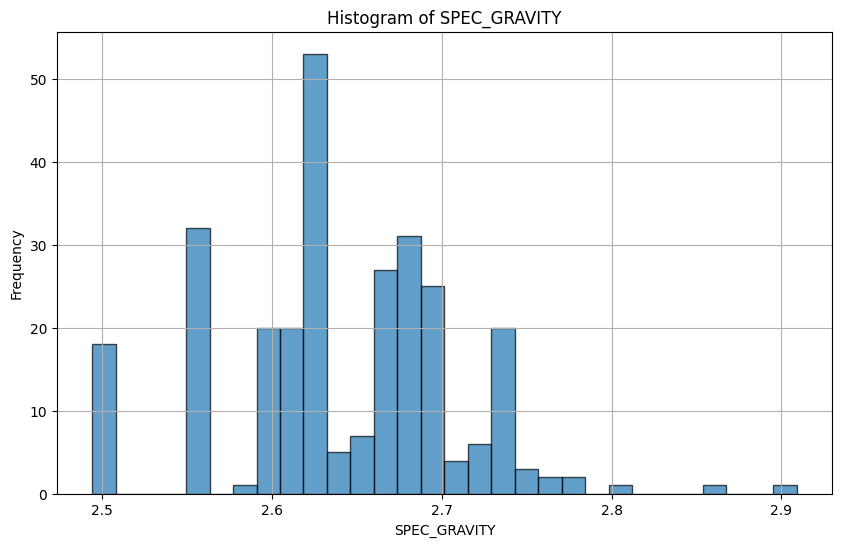

Histogram saved as 'spec_gravity_histogram.png'


<Figure size 640x480 with 0 Axes>

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import os

spec_gravity_stats = Data_3_df['SPEC_GRAVITY'].describe()
mean_spec_gravity = Data_3_df['SPEC_GRAVITY'].mean()
median_spec_gravity = Data_3_df['SPEC_GRAVITY'].median()
std_spec_gravity = Data_3_df['SPEC_GRAVITY'].std()

print("SPEC_GRAVITY Statistics:")
print(spec_gravity_stats)
print(f"Mean: {mean_spec_gravity}")
print(f"Median: {median_spec_gravity}")
print(f"Standard Deviation: {std_spec_gravity}")

plt.figure(figsize=(10, 6))
plt.hist(Data_3_df['SPEC_GRAVITY'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of SPEC_GRAVITY')
plt.xlabel('SPEC_GRAVITY')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
save_path = '/Users/rishithagantyala/Desktop/BTP/DATA/spec_gravity_histogram.png'
plt.savefig(save_path)
print("Histogram saved as 'spec_gravity_histogram.png'")


In [51]:
Data_3_df = pd.read_excel(file_path_2, sheet_name='Data3')

mean_spec_gravity = Data_3_df['SPEC_GRAVITY'].mean()
Data_4_df = Data_3_df.assign(SPEC_GRAVITY=Data_3_df['SPEC_GRAVITY'].fillna(mean_spec_gravity))

print(Data_4_df.head())
print(Data_4_df['SPEC_GRAVITY'].isnull().sum())


   CBR  CON_PRESSURE  NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  RES_MOD_AVG  \
0  NaN     27.600000             41.400002        0.000211        186.0   
1  NaN     27.600000             41.400002        0.000340        107.0   
2  NaN     27.600000             41.299999        0.000542         68.0   
3  NaN     27.600000             41.299999        0.000518         64.0   
4  NaN     27.700001             39.500000        0.000798         48.0   

   SPEC_GRAVITY  LIQUID_LIMIT  PLASTIC_LIMIT  PLASTICITY_INDEX  \
0      2.706000          28.0           18.0              10.0   
1      2.684000          35.0           17.0              18.0   
2      2.639735          49.0           35.0              14.0   
3      2.639735           NaN            NaN               NaN   
4      2.639735           NaN            NaN               NaN   

   MAX_LAB_DRY_DENSITY  OPTIMUM_LAB_MOISTURE  NO_4_PASSING  NO_10_PASSING  \
0                120.0                  12.0     52.000000      45.000000  

In [52]:
with pd.ExcelWriter(file_path_2, engine='openpyxl', mode='a') as writer:
    Data_4_df.to_excel(writer, sheet_name='Data4', index=False)



CON_PRESSURE Statistics:
count    536.000000
mean      28.167351
std        2.983681
min       27.400000
25%       27.600000
50%       27.600000
75%       27.600000
max       68.900002
Name: CON_PRESSURE, dtype: float64
Mean: 28.16735110709916
Median: 27.60000038146973
Standard Deviation: 2.983681058555084


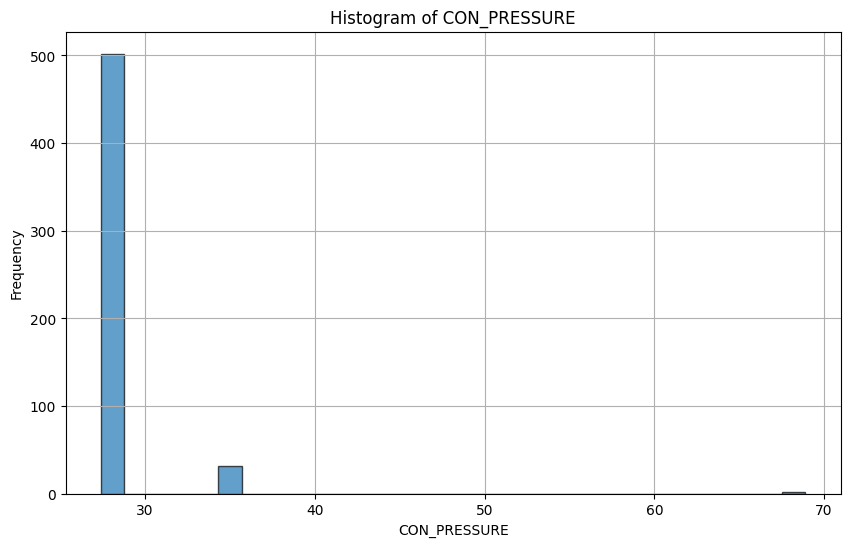

Histogram saved as '/Users/rishithagantyala/Desktop/BTP/DATA/CON_PRESSURE_histogram.png'

NOM_MAX_AXIAL_STRESS Statistics:
count    536.000000
mean      42.120336
std        3.727500
min       39.299999
25%       41.299999
50%       41.299999
75%       41.400002
max       68.900002
Name: NOM_MAX_AXIAL_STRESS, dtype: float64
Mean: 42.12033618386112
Median: 41.29999923706055
Standard Deviation: 3.7275004680688495


<Figure size 640x480 with 0 Axes>

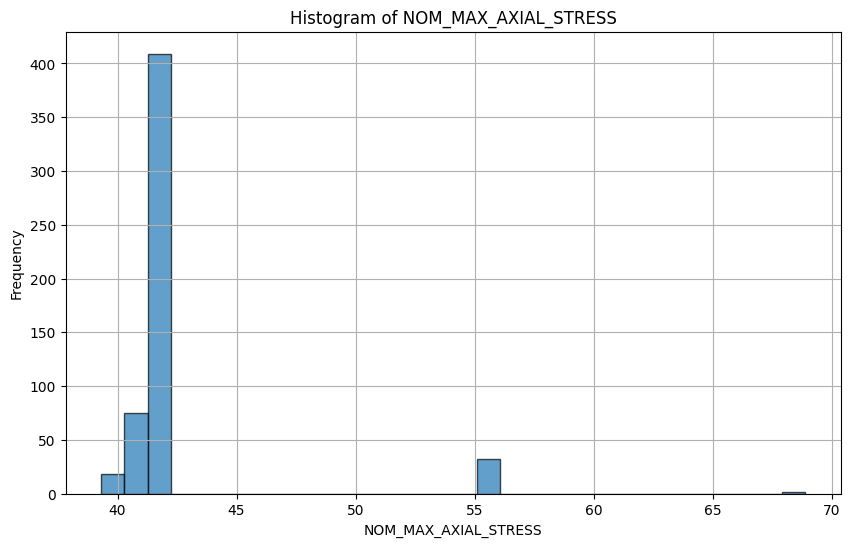

Histogram saved as '/Users/rishithagantyala/Desktop/BTP/DATA/NOM_MAX_AXIAL_STRESS_histogram.png'

RES_STRAIN_AVG Statistics:
count    536.000000
mean       0.000533
std        0.000239
min        0.000211
25%        0.000375
50%        0.000493
75%        0.000593
max        0.002572
Name: RES_STRAIN_AVG, dtype: float64
Mean: 0.00053279011292794
Median: 0.000493000028654933
Standard Deviation: 0.00023933796613895053


<Figure size 640x480 with 0 Axes>

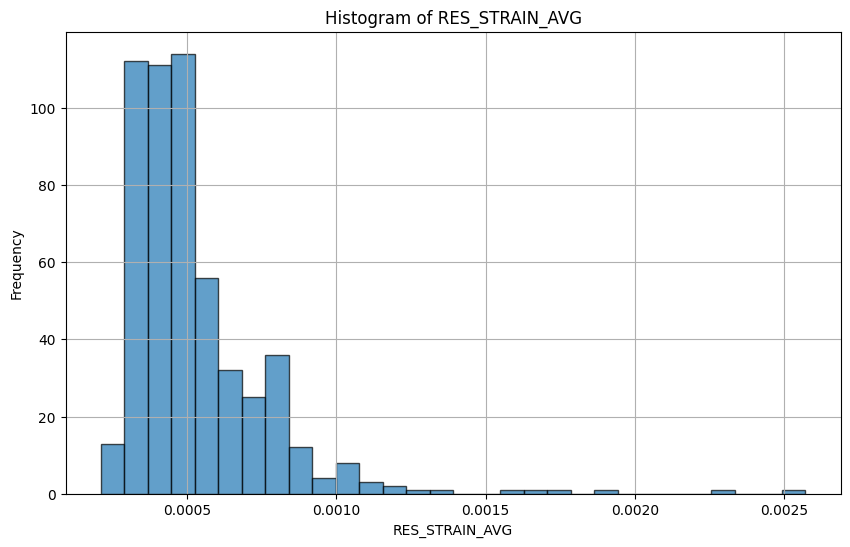

Histogram saved as '/Users/rishithagantyala/Desktop/BTP/DATA/RES_STRAIN_AVG_histogram.png'

RES_MOD_AVG Statistics:
count    536.000000
mean      78.855410
std       26.696828
min       15.000000
25%       56.000000
50%       75.000000
75%      100.000000
max      186.500000
Name: RES_MOD_AVG, dtype: float64
Mean: 78.85541044776119
Median: 75.0
Standard Deviation: 26.696828342886224


<Figure size 640x480 with 0 Axes>

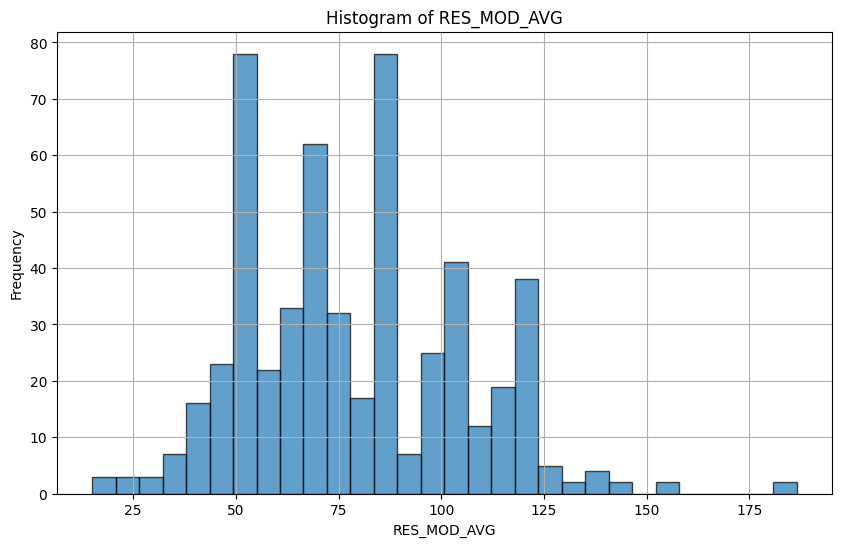

Histogram saved as '/Users/rishithagantyala/Desktop/BTP/DATA/RES_MOD_AVG_histogram.png'


<Figure size 640x480 with 0 Axes>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

Data_4_df = pd.read_excel(file_path_2, sheet_name='Data4')

def analyze_column(data, column_name):
    print(f"\n{column_name} Statistics:")
    column_stats = data[column_name].describe()
    print(column_stats)
    print(f"Mean: {data[column_name].mean()}")
    print(f"Median: {data[column_name].median()}")
    print(f"Standard Deviation: {data[column_name].std()}")

    plt.figure(figsize=(10, 6))
    plt.hist(data[column_name].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    save_path = f'/Users/rishithagantyala/Desktop/BTP/DATA/{column_name}_histogram.png'
    plt.savefig(save_path)
    print(f"Histogram saved as '{save_path}'")

columns_to_analyze = ['CON_PRESSURE', 'NOM_MAX_AXIAL_STRESS', 'RES_STRAIN_AVG', 'RES_MOD_AVG']
for column in columns_to_analyze:
    analyze_column(Data_4_df, column)

In [54]:
 # Calculate IQR and identify outliers
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

con_pressure_iqr_outliers = detect_outliers_iqr(Data_4_df['CON_PRESSURE'])
nom_max_axial_stress_iqr_outliers = detect_outliers_iqr(Data_4_df['NOM_MAX_AXIAL_STRESS'])

print(f"CON_PRESSURE Outliers (IQR):\n{con_pressure_iqr_outliers}")
print(f"NOM_MAX_AXIAL_STRESS Outliers (IQR):\n{nom_max_axial_stress_iqr_outliers}")


CON_PRESSURE Outliers (IQR):
4      27.700001
7      27.700001
11     27.500000
12     27.700001
15     27.799999
         ...    
651    34.500000
652    34.500000
653    34.500000
654    34.500000
655    34.500000
Name: CON_PRESSURE, Length: 61, dtype: float64
NOM_MAX_AXIAL_STRESS Outliers (IQR):
4       39.500000
7       39.799999
11      40.700001
12      40.500000
15      39.700001
          ...    
1034    40.599998
1036    40.700001
1037    40.299999
1038    39.599998
1040    39.700001
Name: NOM_MAX_AXIAL_STRESS, Length: 126, dtype: float64


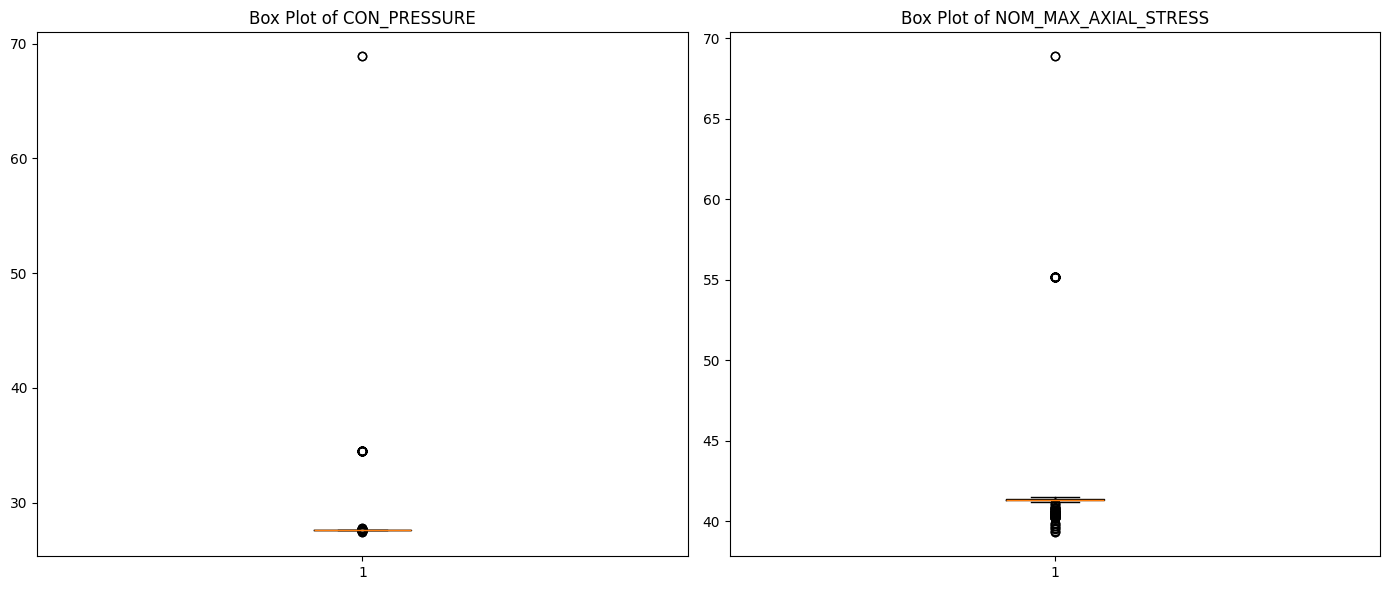

<Figure size 640x480 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt

# Plot box plots for visual inspection
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.boxplot(Data_4_df['CON_PRESSURE'].dropna())
plt.title('Box Plot of CON_PRESSURE')

plt.subplot(1, 2, 2)
plt.boxplot(Data_4_df['NOM_MAX_AXIAL_STRESS'].dropna())
plt.title('Box Plot of NOM_MAX_AXIAL_STRESS')

plt.tight_layout()
plt.show()
save_path = f'/Users/rishithagantyala/Desktop/BTP/DATA/CON_PRESSURE NOM_MAX_AXIAL_STRESS outlier.png'
plt.savefig(save_path)



In [56]:
# Impute missing values with the median for CON_PRESSURE and NOM_MAX_AXIAL_STRESS

# Calculate median values
median_con_pressure = Data_4_df['CON_PRESSURE'].median()
median_nom_max_axial_stress = Data_4_df['NOM_MAX_AXIAL_STRESS'].median()


Data_4_df['CON_PRESSURE'] = Data_4_df['CON_PRESSURE'].fillna(median_con_pressure)
Data_4_df['NOM_MAX_AXIAL_STRESS'] = Data_4_df['NOM_MAX_AXIAL_STRESS'].fillna(median_nom_max_axial_stress)


print("Missing values in CON_PRESSURE after imputation:", Data_4_df['CON_PRESSURE'].isnull().sum())
print("Missing values in NOM_MAX_AXIAL_STRESS after imputation:", Data_4_df['NOM_MAX_AXIAL_STRESS'].isnull().sum())



Missing values in CON_PRESSURE after imputation: 0
Missing values in NOM_MAX_AXIAL_STRESS after imputation: 0


In [57]:
with pd.ExcelWriter(file_path_2, engine='openpyxl', mode='a') as writer:
    Data_4_df.to_excel(writer, sheet_name='Data5', index=False)



In [58]:
Data_5_df = pd.read_excel(file_path_2, sheet_name='Data5')
print(Data_5_df.head())

   CBR  CON_PRESSURE  NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  RES_MOD_AVG  \
0  NaN     27.600000             41.400002        0.000211        186.0   
1  NaN     27.600000             41.400002        0.000340        107.0   
2  NaN     27.600000             41.299999        0.000542         68.0   
3  NaN     27.600000             41.299999        0.000518         64.0   
4  NaN     27.700001             39.500000        0.000798         48.0   

   SPEC_GRAVITY  LIQUID_LIMIT  PLASTIC_LIMIT  PLASTICITY_INDEX  \
0      2.706000          28.0           18.0              10.0   
1      2.684000          35.0           17.0              18.0   
2      2.639735          49.0           35.0              14.0   
3      2.639735           NaN            NaN               NaN   
4      2.639735           NaN            NaN               NaN   

   MAX_LAB_DRY_DENSITY  OPTIMUM_LAB_MOISTURE  NO_4_PASSING  NO_10_PASSING  \
0                120.0                  12.0     52.000000      45.000000  

Correlation Matrix:
                            CBR  CON_PRESSURE  NOM_MAX_AXIAL_STRESS  \
CBR                   1.000000           NaN             -0.173616   
CON_PRESSURE               NaN      1.000000              0.859540   
NOM_MAX_AXIAL_STRESS -0.173616      0.859540              1.000000   
RES_STRAIN_AVG        0.841229     -0.101700             -0.130996   
RES_MOD_AVG          -0.696315      0.195132              0.134998   
SPEC_GRAVITY         -0.593514     -0.065068             -0.085877   
LIQUID_LIMIT         -1.000000     -0.122913             -0.171359   
PLASTIC_LIMIT        -1.000000     -0.040126             -0.045420   
PLASTICITY_INDEX     -1.000000     -0.130051             -0.185666   
MAX_LAB_DRY_DENSITY   1.000000      0.209858              0.253499   
OPTIMUM_LAB_MOISTURE -1.000000     -0.201543             -0.250685   
NO_4_PASSING          0.587038     -0.261912             -0.340063   
NO_10_PASSING         0.632071     -0.242275             -0.316700   

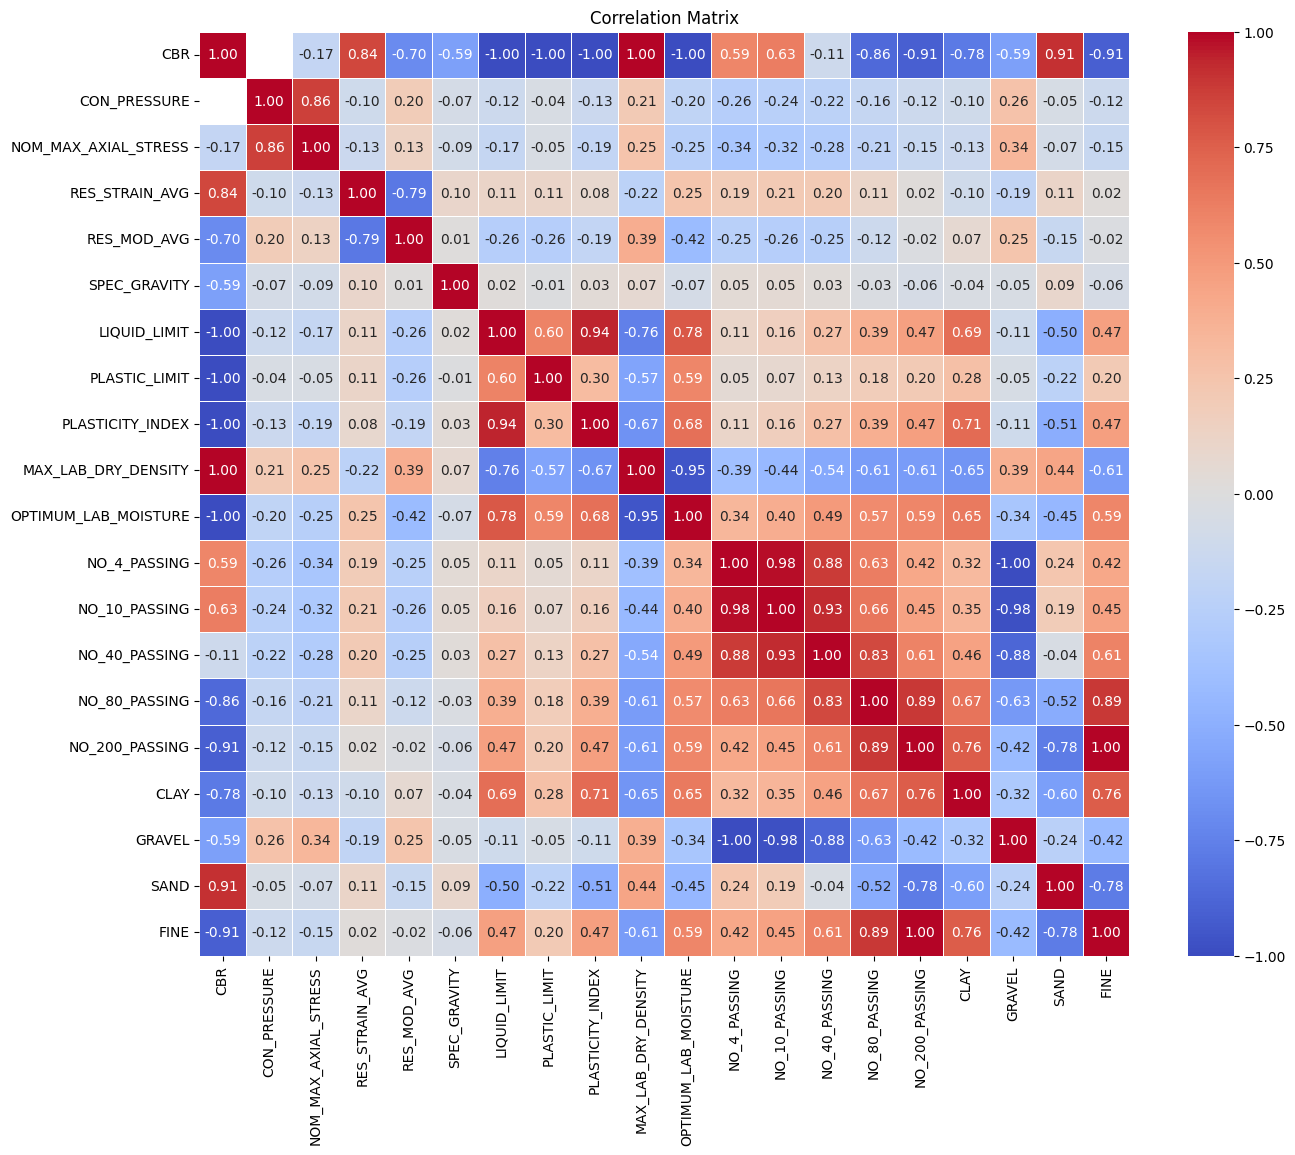

In [59]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path_2 = '/Users/rishithagantyala/Desktop/BTP/DATA/combined_data.xlsx'
Data_5_df = pd.read_excel(file_path_2, sheet_name='Data5')

# Calculate the correlation matrix
correlation_matrix = Data_5_df.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Create and save the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix')


save_path = f'/Users/rishithagantyala/Desktop/BTP/DATA/Correlation1.png'
plt.savefig(save_path)

In [60]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer

Data_5_df = pd.read_excel(file_path_2, sheet_name='Data5')

correlated_features = ['NO_200_PASSING']

df_notnull = Data_5_df[Data_5_df['CLAY'].notnull()]
df_isnull = Data_5_df[Data_5_df['CLAY'].isnull()]

X_train = df_notnull[correlated_features]
y_train = df_notnull['CLAY']

X_test = df_isnull[correlated_features]

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

Data_5_df.loc[Data_5_df['CLAY'].isnull(), 'CLAY'] = y_pred
with pd.ExcelWriter(file_path_2, mode='a', engine='openpyxl') as writer:
    Data_5_df.to_excel(writer, sheet_name='Data6', index=False)

print("Remaining Missing Values in 'CLAY':\n", Data_5_df['CLAY'].isnull().sum())


Remaining Missing Values in 'CLAY':
 0


In [61]:
Data_6_df = pd.read_excel(file_path_2, sheet_name='Data6')
print(Data_6_df.head())

   CBR  CON_PRESSURE  NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  RES_MOD_AVG  \
0  NaN     27.600000             41.400002        0.000211        186.0   
1  NaN     27.600000             41.400002        0.000340        107.0   
2  NaN     27.600000             41.299999        0.000542         68.0   
3  NaN     27.600000             41.299999        0.000518         64.0   
4  NaN     27.700001             39.500000        0.000798         48.0   

   SPEC_GRAVITY  LIQUID_LIMIT  PLASTIC_LIMIT  PLASTICITY_INDEX  \
0      2.706000          28.0           18.0              10.0   
1      2.684000          35.0           17.0              18.0   
2      2.639735          49.0           35.0              14.0   
3      2.639735           NaN            NaN               NaN   
4      2.639735           NaN            NaN               NaN   

   MAX_LAB_DRY_DENSITY  OPTIMUM_LAB_MOISTURE  NO_4_PASSING  NO_10_PASSING  \
0                120.0                  12.0     52.000000      45.000000  

In [62]:
import pandas as pd
from sklearn.linear_model import LinearRegression

features = ['NO_40_PASSING', 'NO_80_PASSING', 'NO_200_PASSING', 'CLAY']
def fill_missing_values(df, target_column, features):
    df_notnull = df[df[target_column].notnull()]
    df_isnull = df[df[target_column].isnull()]
    X_train = df_notnull[features]
    y_train = df_notnull[target_column]
    X_test = df_isnull[features]
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    df.loc[df[target_column].isnull(), target_column] = y_pred

columns_to_fill = ['OPTIMUM_LAB_MOISTURE', 'MAX_LAB_DRY_DENSITY']
for column in columns_to_fill:
    fill_missing_values(Data_6_df, column, features)

for column in columns_to_fill:
    print(f"Remaining Missing Values in '{column}':", Data_6_df[column].isnull().sum())

with pd.ExcelWriter(file_path_2, mode='a', engine='openpyxl') as writer:
    Data_6_df.to_excel(writer, sheet_name='Data7', index=False)

Remaining Missing Values in 'OPTIMUM_LAB_MOISTURE': 0
Remaining Missing Values in 'MAX_LAB_DRY_DENSITY': 0


In [63]:
Data_7_df = pd.read_excel(file_path_2, sheet_name='Data7')
print(Data_7_df.head())

   CBR  CON_PRESSURE  NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  RES_MOD_AVG  \
0  NaN     27.600000             41.400002        0.000211        186.0   
1  NaN     27.600000             41.400002        0.000340        107.0   
2  NaN     27.600000             41.299999        0.000542         68.0   
3  NaN     27.600000             41.299999        0.000518         64.0   
4  NaN     27.700001             39.500000        0.000798         48.0   

   SPEC_GRAVITY  LIQUID_LIMIT  PLASTIC_LIMIT  PLASTICITY_INDEX  \
0      2.706000          28.0           18.0              10.0   
1      2.684000          35.0           17.0              18.0   
2      2.639735          49.0           35.0              14.0   
3      2.639735           NaN            NaN               NaN   
4      2.639735           NaN            NaN               NaN   

   MAX_LAB_DRY_DENSITY  OPTIMUM_LAB_MOISTURE  NO_4_PASSING  NO_10_PASSING  \
0           120.000000             12.000000     52.000000      45.000000  

In [64]:
import pandas as pd

null_values_info = Data_7_df.isnull().sum()
print(null_values_info)

CBR                     1036
CON_PRESSURE               0
NOM_MAX_AXIAL_STRESS       0
RES_STRAIN_AVG           505
RES_MOD_AVG              505
SPEC_GRAVITY               0
LIQUID_LIMIT             337
PLASTIC_LIMIT            337
PLASTICITY_INDEX         337
MAX_LAB_DRY_DENSITY        0
OPTIMUM_LAB_MOISTURE       0
NO_4_PASSING               0
NO_10_PASSING              0
NO_40_PASSING              0
NO_80_PASSING              0
NO_200_PASSING             0
CLAY                       0
GRAVEL                     0
SAND                       0
FINE                       0
dtype: int64


In [65]:
import pandas as pd
from sklearn.linear_model import LinearRegression

features = ['OPTIMUM_LAB_MOISTURE', 'MAX_LAB_DRY_DENSITY', 'CLAY']
def fill_missing_values(df, target_column, features):
    df_notnull = df[df[target_column].notnull()]
    df_isnull = df[df[target_column].isnull()]
    X_train = df_notnull[features]
    y_train = df_notnull[target_column]
    X_test = df_isnull[features]
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    df.loc[df[target_column].isnull(), target_column] = y_pred

columns_to_fill = ['LIQUID_LIMIT']
for column in columns_to_fill:
    fill_missing_values(Data_7_df, column, features)

for column in columns_to_fill:
    print(f"Remaining Missing Values in '{column}':", Data_7_df[column].isnull().sum())

with pd.ExcelWriter(file_path_2, mode='a', engine='openpyxl') as writer:
    Data_7_df.to_excel(writer, sheet_name='Data8', index=False)

Remaining Missing Values in 'LIQUID_LIMIT': 0


In [66]:
Data_8_df = pd.read_excel(file_path_2, sheet_name='Data8')
print(Data_8_df.head())

   CBR  CON_PRESSURE  NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  RES_MOD_AVG  \
0  NaN     27.600000             41.400002        0.000211        186.0   
1  NaN     27.600000             41.400002        0.000340        107.0   
2  NaN     27.600000             41.299999        0.000542         68.0   
3  NaN     27.600000             41.299999        0.000518         64.0   
4  NaN     27.700001             39.500000        0.000798         48.0   

   SPEC_GRAVITY  LIQUID_LIMIT  PLASTIC_LIMIT  PLASTICITY_INDEX  \
0      2.706000     28.000000           18.0              10.0   
1      2.684000     35.000000           17.0              18.0   
2      2.639735     49.000000           35.0              14.0   
3      2.639735     20.523816            NaN               NaN   
4      2.639735     20.657039            NaN               NaN   

   MAX_LAB_DRY_DENSITY  OPTIMUM_LAB_MOISTURE  NO_4_PASSING  NO_10_PASSING  \
0           120.000000             12.000000     52.000000      45.000000  

In [67]:
import pandas as pd
from sklearn.linear_model import LinearRegression

features = ['OPTIMUM_LAB_MOISTURE', 'MAX_LAB_DRY_DENSITY']
def fill_missing_values(df, target_column, features):
    df_notnull = df[df[target_column].notnull()]
    df_isnull = df[df[target_column].isnull()]
    X_train = df_notnull[features]
    y_train = df_notnull[target_column]
    X_test = df_isnull[features]
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    df.loc[df[target_column].isnull(), target_column] = y_pred

columns_to_fill = ['PLASTIC_LIMIT']
for column in columns_to_fill:
    fill_missing_values(Data_8_df, column, features)

for column in columns_to_fill:
    print(f"Remaining Missing Values in '{column}':", Data_8_df[column].isnull().sum())

with pd.ExcelWriter(file_path_2, mode='a', engine='openpyxl') as writer:
    Data_8_df.to_excel(writer, sheet_name='Data9', index=False)

Remaining Missing Values in 'PLASTIC_LIMIT': 0


In [68]:
Data_9_df = pd.read_excel(file_path_2, sheet_name='Data9')
print(Data_9_df.head())

   CBR  CON_PRESSURE  NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  RES_MOD_AVG  \
0  NaN     27.600000             41.400002        0.000211        186.0   
1  NaN     27.600000             41.400002        0.000340        107.0   
2  NaN     27.600000             41.299999        0.000542         68.0   
3  NaN     27.600000             41.299999        0.000518         64.0   
4  NaN     27.700001             39.500000        0.000798         48.0   

   SPEC_GRAVITY  LIQUID_LIMIT  PLASTIC_LIMIT  PLASTICITY_INDEX  \
0      2.706000     28.000000      18.000000              10.0   
1      2.684000     35.000000      17.000000              18.0   
2      2.639735     49.000000      35.000000              14.0   
3      2.639735     20.523816      16.171357               NaN   
4      2.639735     20.657039      15.975800               NaN   

   MAX_LAB_DRY_DENSITY  OPTIMUM_LAB_MOISTURE  NO_4_PASSING  NO_10_PASSING  \
0           120.000000             12.000000     52.000000      45.000000  

In [69]:
import pandas as pd

Data_9_df['PLASTICITY_INDEX'] = Data_9_df['LIQUID_LIMIT'] - Data_9_df['PLASTIC_LIMIT']
print(f"Remaining Missing Values in 'PLASTICITY_INDEX':", Data_9_df['PLASTICITY_INDEX'].isnull().sum())

with pd.ExcelWriter(file_path_2, mode='a', engine='openpyxl') as writer:
    Data_9_df.to_excel(writer, sheet_name='Data10', index=False)

Remaining Missing Values in 'PLASTICITY_INDEX': 0


In [70]:
Data_10_df = pd.read_excel(file_path_2, sheet_name='Data10')
print(Data_10_df.head())

   CBR  CON_PRESSURE  NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  RES_MOD_AVG  \
0  NaN     27.600000             41.400002        0.000211        186.0   
1  NaN     27.600000             41.400002        0.000340        107.0   
2  NaN     27.600000             41.299999        0.000542         68.0   
3  NaN     27.600000             41.299999        0.000518         64.0   
4  NaN     27.700001             39.500000        0.000798         48.0   

   SPEC_GRAVITY  LIQUID_LIMIT  PLASTIC_LIMIT  PLASTICITY_INDEX  \
0      2.706000     28.000000      18.000000         10.000000   
1      2.684000     35.000000      17.000000         18.000000   
2      2.639735     49.000000      35.000000         14.000000   
3      2.639735     20.523816      16.171357          4.352460   
4      2.639735     20.657039      15.975800          4.681239   

   MAX_LAB_DRY_DENSITY  OPTIMUM_LAB_MOISTURE  NO_4_PASSING  NO_10_PASSING  \
0           120.000000             12.000000     52.000000      45.000000  

In [71]:
file_path_1 = '/Users/rishithagantyala/Desktop/SUBGRADE.xlsx' 
Final_1_df = pd.read_excel(file_path_1, sheet_name='Final1')
print(Final_1_df.head())

   CON_PRESSURE  NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  RES_MOD_AVG  \
0     27.600000             41.400002        0.000211        186.0   
1     27.600000             41.400002        0.000340        107.0   
2     27.600000             41.299999        0.000542         68.0   
3     27.600000             41.299999        0.000518         64.0   
4     27.700001             39.500000        0.000798         48.0   

   SPEC_GRAVITY  LIQUID_LIMIT  PLASTIC_LIMIT  PLASTICITY_INDEX  \
0      2.706000     28.000000      18.000000         10.000000   
1      2.684000     35.000000      17.000000         18.000000   
2      2.639735     49.000000      35.000000         14.000000   
3      2.639735     20.523816      16.171357          4.352460   
4      2.639735     20.657039      15.975800          4.681239   

   MAX_LAB_DRY_DENSITY  OPTIMUM_LAB_MOISTURE  ...  NO_200_PASSING  CLAY  \
0           120.000000             12.000000  ...       28.000000  11.0   
1           116.000000          

Correlation Matrix:
                       CON_PRESSURE  NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  \
CON_PRESSURE              1.000000              0.859540       -0.101700   
NOM_MAX_AXIAL_STRESS      0.859540              1.000000       -0.130996   
RES_STRAIN_AVG           -0.101700             -0.130996        1.000000   
RES_MOD_AVG               0.195132              0.134998       -0.792030   
SPEC_GRAVITY             -0.065068             -0.085877        0.095867   
LIQUID_LIMIT             -0.057239             -0.079575       -0.048136   
PLASTIC_LIMIT            -0.006731             -0.000217        0.026090   
PLASTICITY_INDEX         -0.067101             -0.096772       -0.069699   
MAX_LAB_DRY_DENSITY       0.125473              0.143933       -0.056764   
OPTIMUM_LAB_MOISTURE     -0.118951             -0.141021        0.070324   
NO_4_PASSING             -0.261912             -0.340063        0.194860   
NO_10_PASSING            -0.242275             -0.316700        0.2

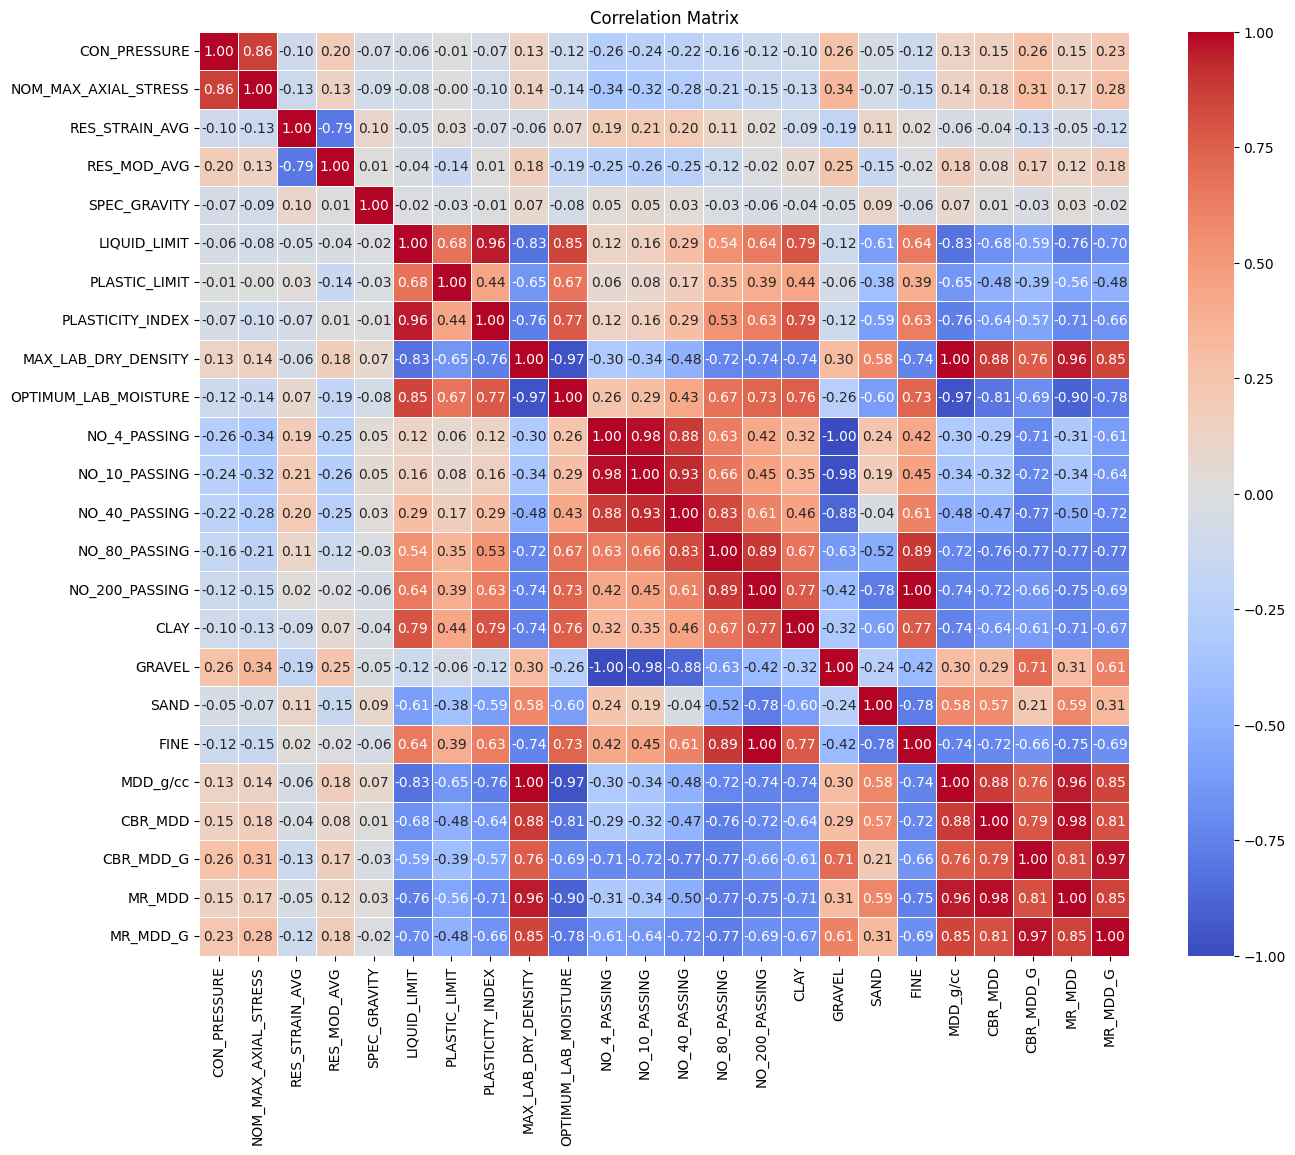

In [72]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = Final_1_df.corr()

print("Correlation Matrix:\n", correlation_matrix)

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix')


save_path = f'/Users/rishithagantyala/Desktop/BTP/DATA/Correlation2.png'
plt.savefig(save_path)

In [73]:
import pandas as pd

null_values_info = Final_1_df.isnull().sum()
print(null_values_info)

CON_PRESSURE              0
NOM_MAX_AXIAL_STRESS      0
RES_STRAIN_AVG          505
RES_MOD_AVG             505
SPEC_GRAVITY              0
LIQUID_LIMIT              0
PLASTIC_LIMIT             0
PLASTICITY_INDEX          0
MAX_LAB_DRY_DENSITY       0
OPTIMUM_LAB_MOISTURE      0
NO_4_PASSING              0
NO_10_PASSING             0
NO_40_PASSING             0
NO_80_PASSING             0
NO_200_PASSING            0
CLAY                      0
GRAVEL                    0
SAND                      0
FINE                      0
MDD_g/cc                  0
CBR_MDD                   0
CBR_MDD_G                 0
MR_MDD                    0
MR_MDD_G                  0
dtype: int64


In [74]:
import pandas as pd
Final_1_df['RES_MOD_AVG'] = Final_1_df['RES_MOD_AVG'].interpolate(method='linear', limit_direction='forward', axis=0)
print(f"Remaining Missing Values in 'RES_MOD_AVG':", Final_1_df['RES_MOD_AVG'].isnull().sum())
with pd.ExcelWriter(file_path_2, mode='a', engine='openpyxl') as writer:
    Final_1_df.to_excel(writer, sheet_name='Final1', index=False)
print(Final_1_df.head())

Remaining Missing Values in 'RES_MOD_AVG': 0
   CON_PRESSURE  NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  RES_MOD_AVG  \
0     27.600000             41.400002        0.000211        186.0   
1     27.600000             41.400002        0.000340        107.0   
2     27.600000             41.299999        0.000542         68.0   
3     27.600000             41.299999        0.000518         64.0   
4     27.700001             39.500000        0.000798         48.0   

   SPEC_GRAVITY  LIQUID_LIMIT  PLASTIC_LIMIT  PLASTICITY_INDEX  \
0      2.706000     28.000000      18.000000         10.000000   
1      2.684000     35.000000      17.000000         18.000000   
2      2.639735     49.000000      35.000000         14.000000   
3      2.639735     20.523816      16.171357          4.352460   
4      2.639735     20.657039      15.975800          4.681239   

   MAX_LAB_DRY_DENSITY  OPTIMUM_LAB_MOISTURE  ...  NO_200_PASSING  CLAY  \
0           120.000000             12.000000  ...       28.000

In [75]:
import pandas as pd
Final_1_df = pd.read_excel(file_path_2, sheet_name='Final1')

Final_1_df['RES_STRAIN_AVG'] = (Final_1_df['NOM_MAX_AXIAL_STRESS'] / (Final_1_df['RES_MOD_AVG'] * 1000)).round(7)
with pd.ExcelWriter(file_path_2, mode='a', engine='openpyxl') as writer:
    Final_1_df.to_excel(writer, sheet_name='Final2', index=False)

Final_2_df = pd.read_excel(file_path_2, sheet_name='Final2')
print(Final_2_df.head())

   CON_PRESSURE  NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  RES_MOD_AVG  \
0     27.600000             41.400002        0.000223        186.0   
1     27.600000             41.400002        0.000387        107.0   
2     27.600000             41.299999        0.000607         68.0   
3     27.600000             41.299999        0.000645         64.0   
4     27.700001             39.500000        0.000823         48.0   

   SPEC_GRAVITY  LIQUID_LIMIT  PLASTIC_LIMIT  PLASTICITY_INDEX  \
0      2.706000     28.000000      18.000000         10.000000   
1      2.684000     35.000000      17.000000         18.000000   
2      2.639735     49.000000      35.000000         14.000000   
3      2.639735     20.523816      16.171357          4.352460   
4      2.639735     20.657039      15.975800          4.681239   

   MAX_LAB_DRY_DENSITY  OPTIMUM_LAB_MOISTURE  ...  NO_200_PASSING  CLAY  \
0           120.000000             12.000000  ...       28.000000  11.0   
1           116.000000          

In [76]:
import pandas as pd

null_values_info = Final_2_df.isnull().sum()
print(null_values_info)

CON_PRESSURE            0
NOM_MAX_AXIAL_STRESS    0
RES_STRAIN_AVG          0
RES_MOD_AVG             0
SPEC_GRAVITY            0
LIQUID_LIMIT            0
PLASTIC_LIMIT           0
PLASTICITY_INDEX        0
MAX_LAB_DRY_DENSITY     0
OPTIMUM_LAB_MOISTURE    0
NO_4_PASSING            0
NO_10_PASSING           0
NO_40_PASSING           0
NO_80_PASSING           0
NO_200_PASSING          0
CLAY                    0
GRAVEL                  0
SAND                    0
FINE                    0
MDD_g/cc                0
CBR_MDD                 0
CBR_MDD_G               0
MR_MDD                  0
MR_MDD_G                0
dtype: int64


In [139]:
import pandas as pd

columns_to_drop = ['CON_PRESSURE','NOM_MAX_AXIAL_STRESS','RES_STRAIN_AVG','RES_MOD_AVG','SPEC_GRAVITY','MAX_LAB_DRY_DENSITY']

Final_3_df= Final_2_df.drop(columns=columns_to_drop)

with pd.ExcelWriter(file_path_2, engine='openpyxl', mode='a') as writer:
    Final_3_df.to_excel(writer, sheet_name='Final3', index=False)


print(Final_3_df.head())

   LIQUID_LIMIT  PLASTIC_LIMIT  PLASTICITY_INDEX  OPTIMUM_LAB_MOISTURE  \
0         28.00          18.00             10.00                 12.00   
1         35.00          17.00             18.00                 14.00   
2         49.00          35.00             14.00                 20.00   
3         20.52          16.17              4.35                  9.83   
4         20.66          15.98              4.68                  9.46   

   NO_4_PASSING  NO_10_PASSING  NO_40_PASSING  NO_80_PASSING  NO_200_PASSING  \
0          52.0           45.0           36.0           32.0            28.0   
1          89.0           78.0           69.0           66.0            61.3   
2          99.1           97.8           89.6           82.1            68.0   
3          75.3           65.0           47.3           35.4            13.5   
4         100.0           98.0           76.0           42.0            24.2   

   CLAY  GRAVEL  SAND  FINE  MDD_g/cc  CBR_MDD  CBR_MDD_G  MR_MDD  MR_MDD_

Correlation Matrix:
                       LIQUID_LIMIT  PLASTIC_LIMIT  PLASTICITY_INDEX  \
LIQUID_LIMIT              1.000000       0.675174          0.959590   
PLASTIC_LIMIT             0.675174       1.000000          0.440311   
PLASTICITY_INDEX          0.959590       0.440311          1.000000   
OPTIMUM_LAB_MOISTURE      0.845259       0.669718          0.773325   
NO_4_PASSING              0.118813       0.064362          0.120062   
NO_10_PASSING             0.156275       0.083676          0.158289   
NO_40_PASSING             0.292641       0.171749          0.290664   
NO_80_PASSING             0.544734       0.346374          0.530880   
NO_200_PASSING            0.643115       0.393896          0.632501   
CLAY                      0.789802       0.436166          0.794921   
GRAVEL                   -0.118813      -0.064362         -0.120062   
SAND                     -0.607052      -0.377630         -0.594811   
FINE                      0.643115       0.393896       

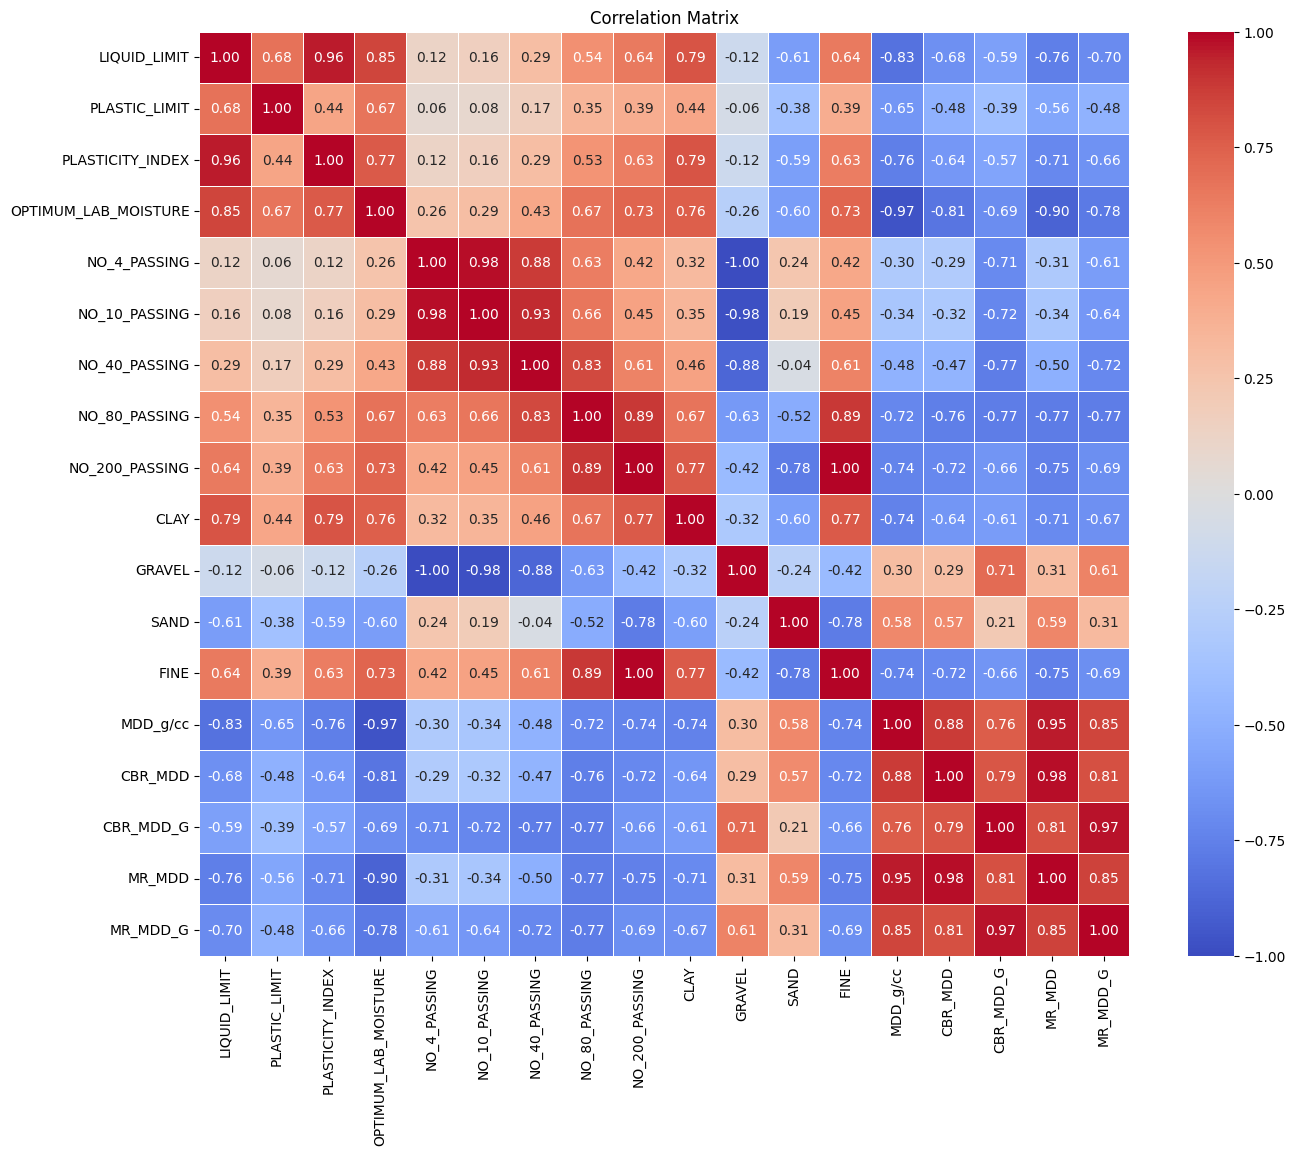

In [140]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = Final_3_df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix')


save_path = f'/Users/rishithagantyala/Desktop/BTP/DATA/Correlation4.png'
plt.savefig(save_path)
print("Correlation Matrix:\n", correlation_matrix)

In [141]:
from scipy import stats
import numpy as np

# Calculate Z-scores
z_scores = np.abs(stats.zscore(Final_3_df))

# Define a threshold for Z-score (commonly 3)
threshold = 3

# Get outliers
outliers = np.where(z_scores > threshold)

# Print outliers
print("Outliers found at positions:", outliers)


Outliers found at positions: (array([   2,    6,    9,   91,  104,  104,  113,  113,  152,  186,  186,
        186,  187,  187,  187,  190,  190,  191,  191,  194,  194,  195,
        195,  198,  198,  199,  199,  202,  202,  203,  203,  204,  206,
        206,  207,  208,  210,  210,  211,  214,  215,  218,  219,  283,
        288,  290,  290,  290,  290,  291,  291,  291,  291,  291,  291,
        292,  293,  302,  309,  309,  319,  320,  323,  350,  350,  350,
        350,  352,  352,  352,  354,  377,  387,  396,  396,  396,  396,
        397,  397,  397,  419,  485,  485,  485,  485,  532,  551,  551,
        557,  572,  572,  578,  590,  590,  590,  590,  602,  602,  618,
        618,  618,  618,  619,  619,  803,  803,  803,  806,  806,  807,
        808,  814,  815,  815,  815,  889,  889,  889,  889,  997, 1000]), array([ 1,  1,  1,  2,  0,  2,  0,  2,  9,  0,  2,  9,  0,  2,  9,  0,  2,
        0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2, 17,  1, 17,
        1, 17, 

In [142]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = Final_3_df.quantile(0.25)
Q3 = Final_3_df.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = (Final_3_df < lower_bound) | (Final_3_df > upper_bound)

# Print outliers
print(outliers.sum())



LIQUID_LIMIT            45
PLASTIC_LIMIT           56
PLASTICITY_INDEX        30
OPTIMUM_LAB_MOISTURE    41
NO_4_PASSING            38
NO_10_PASSING           15
NO_40_PASSING            1
NO_80_PASSING            0
NO_200_PASSING           0
CLAY                     6
GRAVEL                  38
SAND                     0
FINE                     0
MDD_g/cc                 0
CBR_MDD                 20
CBR_MDD_G               55
MR_MDD                   2
MR_MDD_G                13
dtype: int64


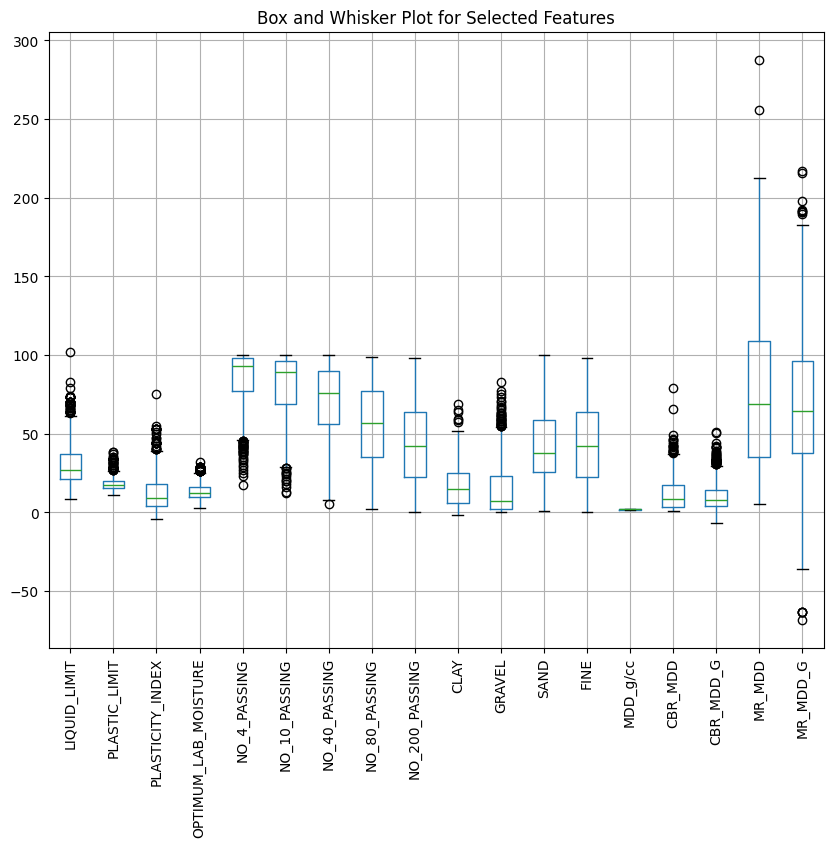

In [143]:
import matplotlib.pyplot as plt

# Create box and whisker plots for the relevant columns
plt.figure(figsize=(10, 8))
Final_3_df[['LIQUID_LIMIT','PLASTIC_LIMIT','PLASTICITY_INDEX','OPTIMUM_LAB_MOISTURE','NO_4_PASSING','NO_10_PASSING','NO_40_PASSING','NO_80_PASSING','NO_200_PASSING','CLAY','GRAVEL','SAND','FINE','MDD_g/cc','CBR_MDD','CBR_MDD_G','MR_MDD','MR_MDD_G']].boxplot()
plt.xticks(rotation=90)
plt.title('Box and Whisker Plot for Selected Features')
plt.show()


In [144]:
import numpy as np

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = Final_3_df.quantile(0.25)
Q3 = Final_3_df.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers: Keep rows where all values are within bounds
Final_4_df = Final_3_df[~((Final_3_df < lower_bound) | (Final_3_df > upper_bound)).any(axis=1)]

# Check the shape of the new DataFrame
print("Shape of Final_4_df after removing outliers:", Final_4_df.shape)


Shape of Final_4_df after removing outliers: (856, 18)


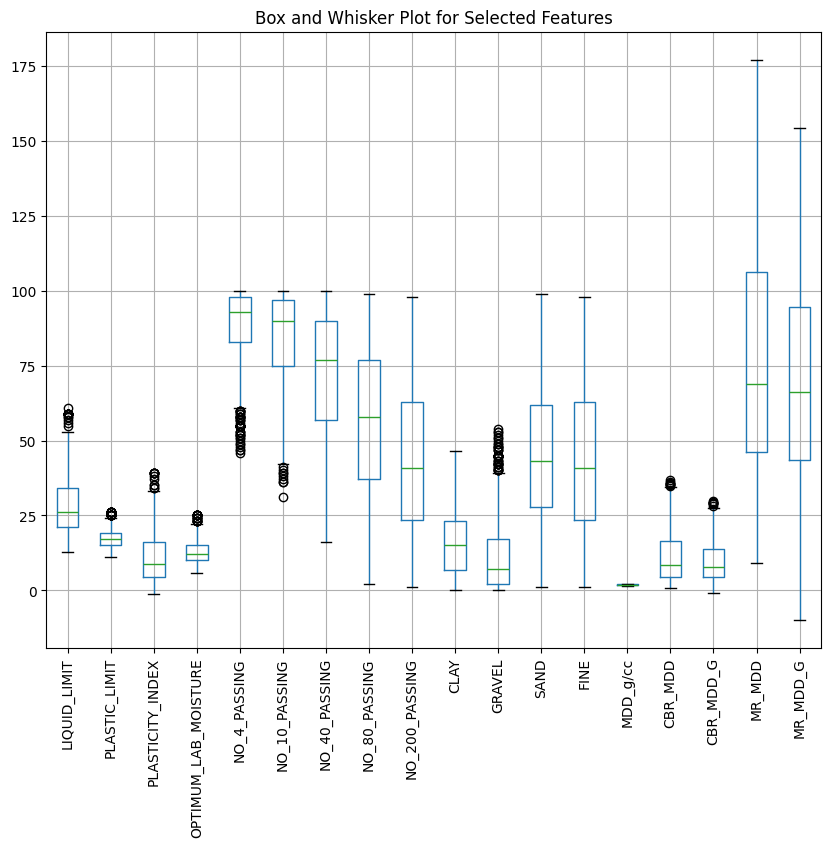

In [145]:
import matplotlib.pyplot as plt

# Create box and whisker plots for the relevant columns
plt.figure(figsize=(10, 8))
Final_4_df[['LIQUID_LIMIT','PLASTIC_LIMIT','PLASTICITY_INDEX','OPTIMUM_LAB_MOISTURE','NO_4_PASSING','NO_10_PASSING','NO_40_PASSING','NO_80_PASSING','NO_200_PASSING','CLAY','GRAVEL','SAND','FINE','MDD_g/cc','CBR_MDD','CBR_MDD_G','MR_MDD','MR_MDD_G']].boxplot()
plt.xticks(rotation=90)
plt.title('Box and Whisker Plot for Selected Features')
plt.show()


In [146]:
print(Final_4_df.columns)

Index(['LIQUID_LIMIT', 'PLASTIC_LIMIT', 'PLASTICITY_INDEX',
       'OPTIMUM_LAB_MOISTURE', 'NO_4_PASSING', 'NO_10_PASSING',
       'NO_40_PASSING', 'NO_80_PASSING', 'NO_200_PASSING', 'CLAY', 'GRAVEL',
       'SAND', 'FINE', 'MDD_g/cc', 'CBR_MDD', 'CBR_MDD_G', 'MR_MDD',
       'MR_MDD_G'],
      dtype='object')


In [147]:
with pd.ExcelWriter(file_path, engine='openpyxl', mode='a',if_sheet_exists='replace') as writer:
    Final_4_df.to_excel(writer, sheet_name='Final4', index=False)


print(Final_4_df)

      LIQUID_LIMIT  PLASTIC_LIMIT  PLASTICITY_INDEX  OPTIMUM_LAB_MOISTURE  \
0            28.00          18.00             10.00                 12.00   
1            35.00          17.00             18.00                 14.00   
3            20.52          16.17              4.35                  9.83   
4            20.66          15.98              4.68                  9.46   
5            40.00          18.00             22.00                 17.00   
...            ...            ...               ...                   ...   
1036         16.80          15.26              1.54                  8.14   
1037         16.69          15.16              1.53                  7.95   
1038         19.62          15.88              3.74                  9.29   
1039         25.00          20.00              5.00                 10.00   
1040         20.05          16.06              3.99                  9.61   

      NO_4_PASSING  NO_10_PASSING  NO_40_PASSING  NO_80_PASSING  \
0       

In [148]:
# Display correlation of features with RES_MOD_AVG
correlations_with_target = correlation_matrix['MR_MDD_G']
print("Correlations with MR_MDD_G:\n", correlations_with_target)


Correlations with MR_MDD_G:
 LIQUID_LIMIT           -0.697404
PLASTIC_LIMIT          -0.483420
PLASTICITY_INDEX       -0.664432
OPTIMUM_LAB_MOISTURE   -0.784275
NO_4_PASSING           -0.609178
NO_10_PASSING          -0.639361
NO_40_PASSING          -0.717717
NO_80_PASSING          -0.771292
NO_200_PASSING         -0.686970
CLAY                   -0.673979
GRAVEL                  0.609178
SAND                    0.314534
FINE                   -0.686970
MDD_g/cc                0.845624
CBR_MDD                 0.805565
CBR_MDD_G               0.973815
MR_MDD                  0.854065
MR_MDD_G                1.000000
Name: MR_MDD_G, dtype: float64


In [152]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [153]:
X = Final_4_df[['CBR_MDD_G']]
y = Final_4_df['MR_MDD_G']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Polynomial Regression model (e.g., degree 2)
degree = 2  # Change the degree for higher polynomials
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = poly_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print R-squared value
print(f"Polynomial degree {degree} R-squared value: {r2}")

Polynomial degree 2 R-squared value: 0.9936206144040058


In [155]:
X = Final_4_df[['MDD_g/cc']]
y = Final_4_df['MR_MDD_G']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Polynomial Regression model (e.g., degree 2)
degree = 2  # Change the degree for higher polynomials
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = poly_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print R-squared value
print(f"Polynomial degree {degree} R-squared value: {r2}")

Polynomial degree 2 R-squared value: 0.774203777689677


In [156]:
X = Final_4_df[['CBR_MDD_G', 'MDD_g/cc']]
y = Final_4_df['MR_MDD_G']

degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

y_pred = poly_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"Polynomial degree {degree} with multiple features R-squared value: {r2}")

Polynomial degree 2 with multiple features R-squared value: 0.774203777689677


In [163]:
# Features and target
X = Final_4_df[['CBR_MDD_G', 'MDD_g/cc', 'OPTIMUM_LAB_MOISTURE','NO_80_PASSING','NO_40_PASSING','LIQUID_LIMIT']]  # Select features for MLR
y = Final_4_df['MR_MDD_G']  # Target variable


In [164]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [165]:
# Initialize and train the model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Predict on test data
y_pred = mlr_model.predict(X_test)


r2 = r2_score(y_test, y_pred)
print(f"R-squared value: {r2}")


R-squared value: 0.9889199374796627


In [166]:

coefficients = mlr_model.coef_ 
intercept = mlr_model.intercept_


feature_names = X.columns
equation = "MR_MDD_G = "
for coef, feature in zip(coefficients, feature_names):
    equation += f"({coef} * {feature}) + "
equation += f"{intercept}"

print(f"Equation: {equation}")



Equation: MR_MDD_G = (3.8196449317803634 * CBR_MDD_G) + (50.45533502757594 * MDD_g/cc) + (-0.23648504579280316 * OPTIMUM_LAB_MOISTURE) + (0.10268495374274977 * NO_80_PASSING) + (-0.1592627556637252 * NO_40_PASSING) + (-0.04457135103428967 * LIQUID_LIMIT) + -51.90520911614463


In [167]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 10.720280036320798


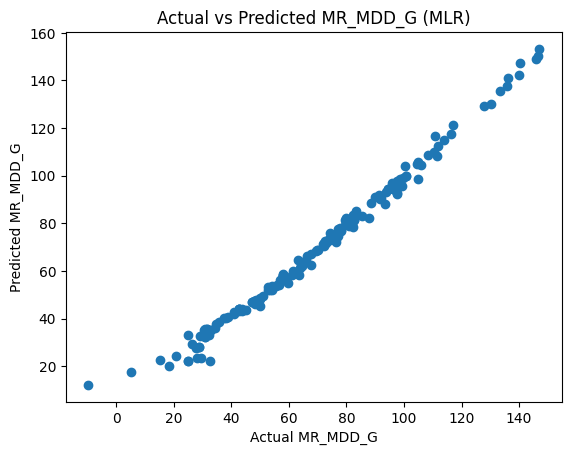

In [168]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual MR_MDD_G')
plt.ylabel('Predicted MR_MDD_G')
plt.title('Actual vs Predicted MR_MDD_G (MLR)')
plt.show()


In [172]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and the features/target are already defined

# Select features and target variable
X = Final_4_df[['CBR_MDD_G', 'MDD_g/cc', 'OPTIMUM_LAB_MOISTURE']]
y = Final_4_df['MR_MDD_G']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
mlr_model = LinearRegression()

# Train the model using the training data
mlr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = mlr_model.predict(X_test)

# Evaluate the model using R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared value: {r2}")

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Coefficients and intercept of the MLR model
coefficients = mlr_model.coef_  # Coefficients of the features
intercept = mlr_model.intercept_

# Display the linear equation
feature_names = X.columns
equation = "MR_MDD_G = "
for coef, feature in zip(coefficients, feature_names):
    equation += f"({coef} * {feature}) + "
equation += f"{intercept}"
print(f"Equation: {equation}")


R-squared value: 0.9876773955171212
Mean Squared Error: 11.92247521986563
Equation: MR_MDD_G = (4.185657241990563 * CBR_MDD_G) + (37.336810080291045 * MDD_g/cc) + (-0.32868175212419354 * OPTIMUM_LAB_MOISTURE) + -36.310699013592554


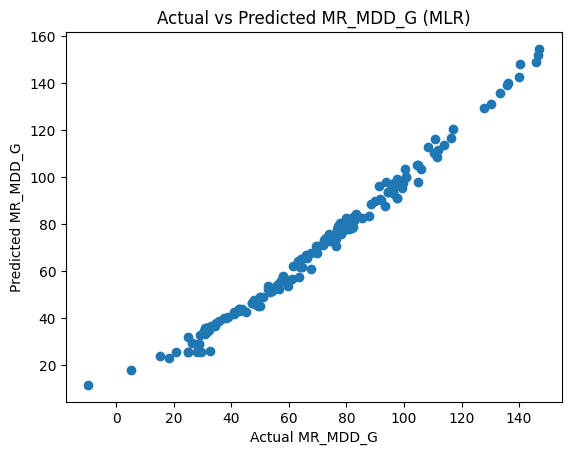

In [173]:
# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual MR_MDD_G')
plt.ylabel('Predicted MR_MDD_G')
plt.title('Actual vs Predicted MR_MDD_G (MLR)')
plt.show()


In [174]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and the features/target are already defined

# Select features and target variable
X = Final_4_df[['CBR_MDD_G', 'MDD_g/cc', 'OPTIMUM_LAB_MOISTURE','LIQUID_LIMIT']]
y = Final_4_df['MR_MDD_G']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
mlr_model = LinearRegression()

# Train the model using the training data
mlr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = mlr_model.predict(X_test)

# Evaluate the model using R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared value: {r2}")

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Coefficients and intercept of the MLR model
coefficients = mlr_model.coef_  # Coefficients of the features
intercept = mlr_model.intercept_

# Display the linear equation
feature_names = X.columns
equation = "MR_MDD_G = "
for coef, feature in zip(coefficients, feature_names):
    equation += f"({coef} * {feature}) + "
equation += f"{intercept}"
print(f"Equation: {equation}")



R-squared value: 0.9876216119955135
Mean Squared Error: 11.976447385812236
Equation: MR_MDD_G = (4.185853937785667 * CBR_MDD_G) + (37.319546018747715 * MDD_g/cc) + (-0.35646540898808826 * OPTIMUM_LAB_MOISTURE) + (0.012978782725604515 * LIQUID_LIMIT) + -36.29319713033583


In [176]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define the features and target
X = Final_4_df[['CBR_MDD_G', 'MDD_g/cc', 'OPTIMUM_LAB_MOISTURE']]  # Add your selected features
y = Final_4_df['MR_MDD_G']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set degree of the polynomial
degree = 2  # You can experiment with different degrees (e.g., 2, 3, etc.)

# Create a pipeline that transforms data with polynomial features and then applies linear regression
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model
poly_model.fit(X_train, y_train)

# Predict on test data
y_pred_poly = poly_model.predict(X_test)

# Evaluate the model
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial degree {degree} R-squared value: {r2_poly}")

# Get the polynomial coefficients and intercept
poly_coefs = poly_model.named_steps['linearregression'].coef_
poly_intercept = poly_model.named_steps['linearregression'].intercept_

# Display the polynomial equation
equation = f"MR_MDD_G = ({poly_intercept}) + "
for i, coef in enumerate(poly_coefs[1:], start=1):  # Skip the intercept
    equation += f"({coef} * X{i}) + "
print(f"Equation: {equation}")


Polynomial degree 2 R-squared value: 0.9970243941494509
Equation: MR_MDD_G = (-753.218103137664) + (5.225284011291638 * X1) + (669.5726291404704 * X2) + (19.94413117397122 * X3) + (-0.02637160754092129 * X4) + (-0.8758579902366767 * X5) + (0.16878191732363027 * X6) + (-138.19810432183647 * X7) + (-9.596761716618431 * X8) + (-0.12094245192871594 * X9) + 


In [103]:
Trial_df = pd.read_excel(file_path_1, sheet_name='Trial')
print(Trial_df.head())

   STATE_CODE SHRP_ID LOC_NO SAMPLE_NO  SPEC_GRAVITY  LIQUID_LIMIT  \
0          48    0001    TP1      BS55      2.706000     28.000000   
1          48    0001    BA*      BS**      2.684000     35.000000   
2           1    0101     B6      BS06      2.639735     49.000000   
3          12    0101     B5      BS05      2.639735     20.523816   
4          32    0101    B26      BS01      2.639735     20.657039   

   PLASTIC_LIMIT  PLASTICITY_INDEX  MAX_LAB_DRY_DENSITY  OPTIMUM_LAB_MOISTURE  \
0      18.000000         10.000000           120.000000             12.000000   
1      17.000000         18.000000           116.000000             14.000000   
2      35.000000         14.000000           104.000000             20.000000   
3      16.171357          4.352460           124.096276              9.829536   
4      15.975800          4.681239           125.580090              9.464077   

   NO_4_PASSING  NO_10_PASSING  NO_40_PASSING  NO_80_PASSING  NO_200_PASSING  \
0     52.000

In [104]:
MR_df = pd.read_excel(file_path_1, sheet_name='MR')
print(MR_df.head())

   STATE_CODE STATE_CODE_EXP SHRP_ID LOC_NO SAMPLE_NO  CON_PRESSURE  \
0           1        Alabama    0101     B6      BS06          27.6   
1           1        Alabama    0101     B6      BS06          13.8   
2           1        Alabama    0101     B6      BS06          13.8   
3           1        Alabama    0101     B6      BS06          27.6   
4           1        Alabama    0101     B6      BS06          27.6   

   NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  RES_MOD_AVG  
0             13.800000        0.000177           70  
1             13.800000        0.000183           68  
2             68.900002        0.001062           59  
3             27.600000        0.000350           71  
4             55.099998        0.000764           66  


In [105]:
Trial_1_df = pd.merge(MR_df,Trial_df, on=['STATE_CODE','SHRP_ID','LOC_NO','SAMPLE_NO'], how='right')
print("\nTrial 1 DataFrame:")
print(Trial_1_df.head())


Trial 1 DataFrame:
   STATE_CODE STATE_CODE_EXP SHRP_ID LOC_NO SAMPLE_NO  CON_PRESSURE  \
0          48          Texas    0001    TP1      BS55     41.400002   
1          48          Texas    0001    TP1      BS55     13.800000   
2          48          Texas    0001    TP1      BS55     27.600000   
3          48          Texas    0001    TP1      BS55     27.600000   
4          48          Texas    0001    TP1      BS55     13.800000   

   NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  RES_MOD_AVG  SPEC_GRAVITY  ...  \
0             27.600000        0.000127        199.0         2.706  ...   
1             13.800000        0.000076        166.0         2.706  ...   
2             55.200001        0.000280        179.0         2.706  ...   
3             27.600000        0.000133        190.0         2.706  ...   
4             27.600000        0.000178        142.0         2.706  ...   

   OPTIMUM_LAB_MOISTURE  NO_4_PASSING  NO_10_PASSING  NO_40_PASSING  \
0                  12.0        

In [106]:
file_path_2 = '/Users/rishithagantyala/Desktop/BTP/DATA/combined_data.xlsx'
with pd.ExcelWriter(file_path_2, engine='openpyxl', mode='a',if_sheet_exists='replace') as writer:
    Trial_1_df.to_excel(writer, sheet_name='Trial', index=False)

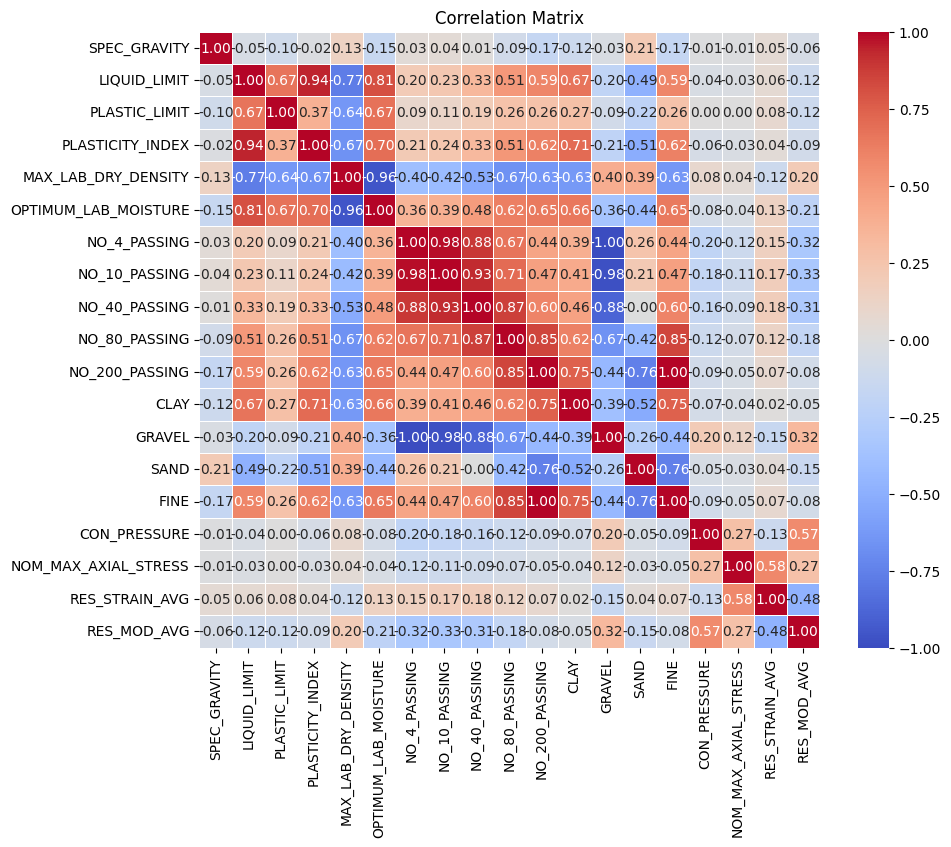

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



columns_of_interest = ['SPEC_GRAVITY','LIQUID_LIMIT','PLASTIC_LIMIT','PLASTICITY_INDEX','MAX_LAB_DRY_DENSITY','OPTIMUM_LAB_MOISTURE','NO_4_PASSING','NO_10_PASSING','NO_40_PASSING','NO_80_PASSING','NO_200_PASSING','CLAY','GRAVEL','SAND','FINE','CON_PRESSURE','NOM_MAX_AXIAL_STRESS','RES_STRAIN_AVG','RES_MOD_AVG']
selected_df = Trial_1_df[columns_of_interest]

corr_matrix = selected_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [108]:
Trial_2_df = pd.read_excel(file_path_1, sheet_name='Trial2')
print(Trial_2_df.head())

   STATE_CODE SHRP_ID LOC_NO SAMPLE_NO  SPEC_GRAVITY  LIQUID_LIMIT  \
0          48    0001    TP1      BS55          2.71         28.00   
1          48    0001    BA*      BS**          2.68         35.00   
2           1    0101     B6      BS06          2.64         49.00   
3          12    0101     B5      BS05          2.64         20.52   
4          32    0101    B26      BS01          2.64         20.66   

   PLASTIC_LIMIT  PLASTICITY_INDEX  MAX_LAB_DRY_DENSITY  OPTIMUM_LAB_MOISTURE  \
0          18.00             10.00               120.00                 12.00   
1          17.00             18.00               116.00                 14.00   
2          35.00             14.00               104.00                 20.00   
3          16.17              4.35               124.10                  9.83   
4          15.98              4.68               125.58                  9.46   

   ...  NO_200_PASSING  CLAY  GRAVEL  SAND  FINE  MDD_g/cc  CBR_MDD  \
0  ...            28.

In [109]:
Trial_3_df = pd.merge(MR_df,Trial_2_df, on=['STATE_CODE','SHRP_ID','LOC_NO','SAMPLE_NO'], how='right')
print("\nTrial 3 DataFrame:")
print(Trial_3_df.head())


Trial 3 DataFrame:
   STATE_CODE STATE_CODE_EXP SHRP_ID LOC_NO SAMPLE_NO  CON_PRESSURE  \
0          48          Texas    0001    TP1      BS55     41.400002   
1          48          Texas    0001    TP1      BS55     13.800000   
2          48          Texas    0001    TP1      BS55     27.600000   
3          48          Texas    0001    TP1      BS55     27.600000   
4          48          Texas    0001    TP1      BS55     13.800000   

   NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  RES_MOD_AVG  SPEC_GRAVITY  ...  \
0             27.600000        0.000127        199.0          2.71  ...   
1             13.800000        0.000076        166.0          2.71  ...   
2             55.200001        0.000280        179.0          2.71  ...   
3             27.600000        0.000133        190.0          2.71  ...   
4             27.600000        0.000178        142.0          2.71  ...   

   NO_200_PASSING  CLAY  GRAVEL  SAND  FINE  MDD_g/cc  CBR_MDD  CBR_MDD_G  \
0            28.0  11.0  

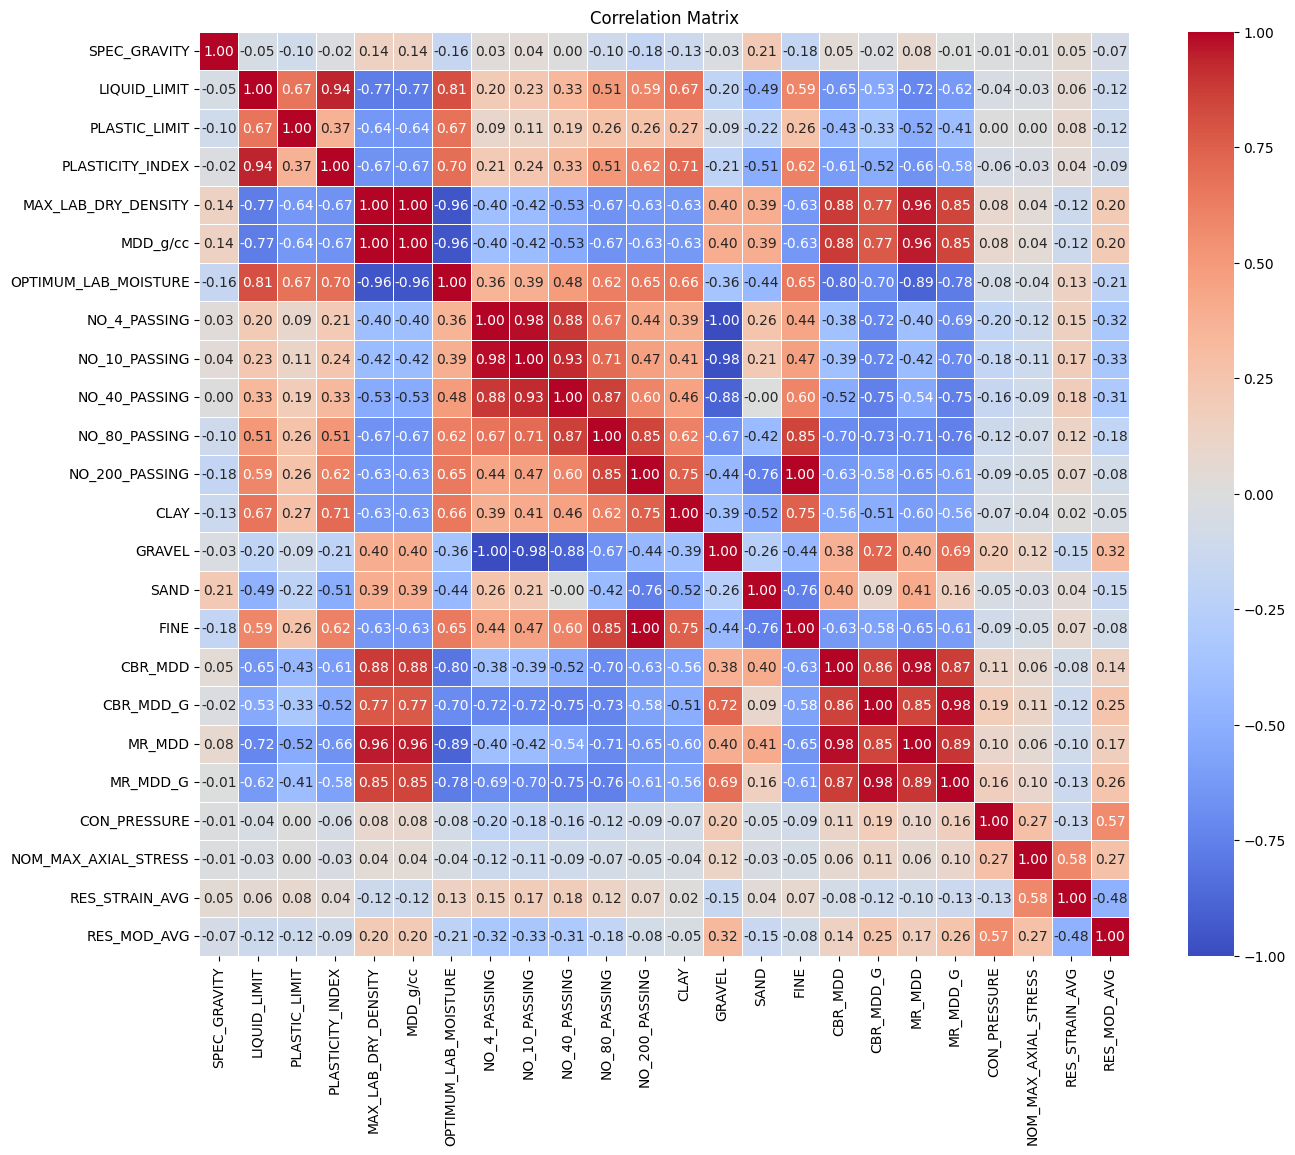

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



columns_of_interest = ['SPEC_GRAVITY','LIQUID_LIMIT','PLASTIC_LIMIT','PLASTICITY_INDEX','MAX_LAB_DRY_DENSITY','MDD_g/cc','OPTIMUM_LAB_MOISTURE','NO_4_PASSING','NO_10_PASSING','NO_40_PASSING','NO_80_PASSING','NO_200_PASSING','CLAY','GRAVEL','SAND','FINE','CBR_MDD','CBR_MDD_G','MR_MDD','MR_MDD_G','CON_PRESSURE', 'NOM_MAX_AXIAL_STRESS', 'RES_STRAIN_AVG', 'RES_MOD_AVG']
selected_df = Trial_3_df[columns_of_interest]

corr_matrix = selected_df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Correlation Matrix:
                       CON_PRESSURE  NOM_MAX_AXIAL_STRESS  RES_STRAIN_AVG  \
CON_PRESSURE              1.000000              0.859540       -0.005735   
NOM_MAX_AXIAL_STRESS      0.859540              1.000000        0.024625   
RES_STRAIN_AVG           -0.005735              0.024625        1.000000   
RES_MOD_AVG               0.148108              0.104532       -0.847389   
SPEC_GRAVITY             -0.061313             -0.082964       -0.000727   
LIQUID_LIMIT             -0.057238             -0.079575       -0.013096   
PLASTIC_LIMIT            -0.006732             -0.000219        0.054267   
PLASTICITY_INDEX         -0.067102             -0.096772       -0.036644   
MAX_LAB_DRY_DENSITY       0.125475              0.143935       -0.079461   
OPTIMUM_LAB_MOISTURE     -0.118947             -0.141018        0.089080   
NO_4_PASSING             -0.261912             -0.340063        0.047916   
NO_10_PASSING            -0.242275             -0.316700        0.0

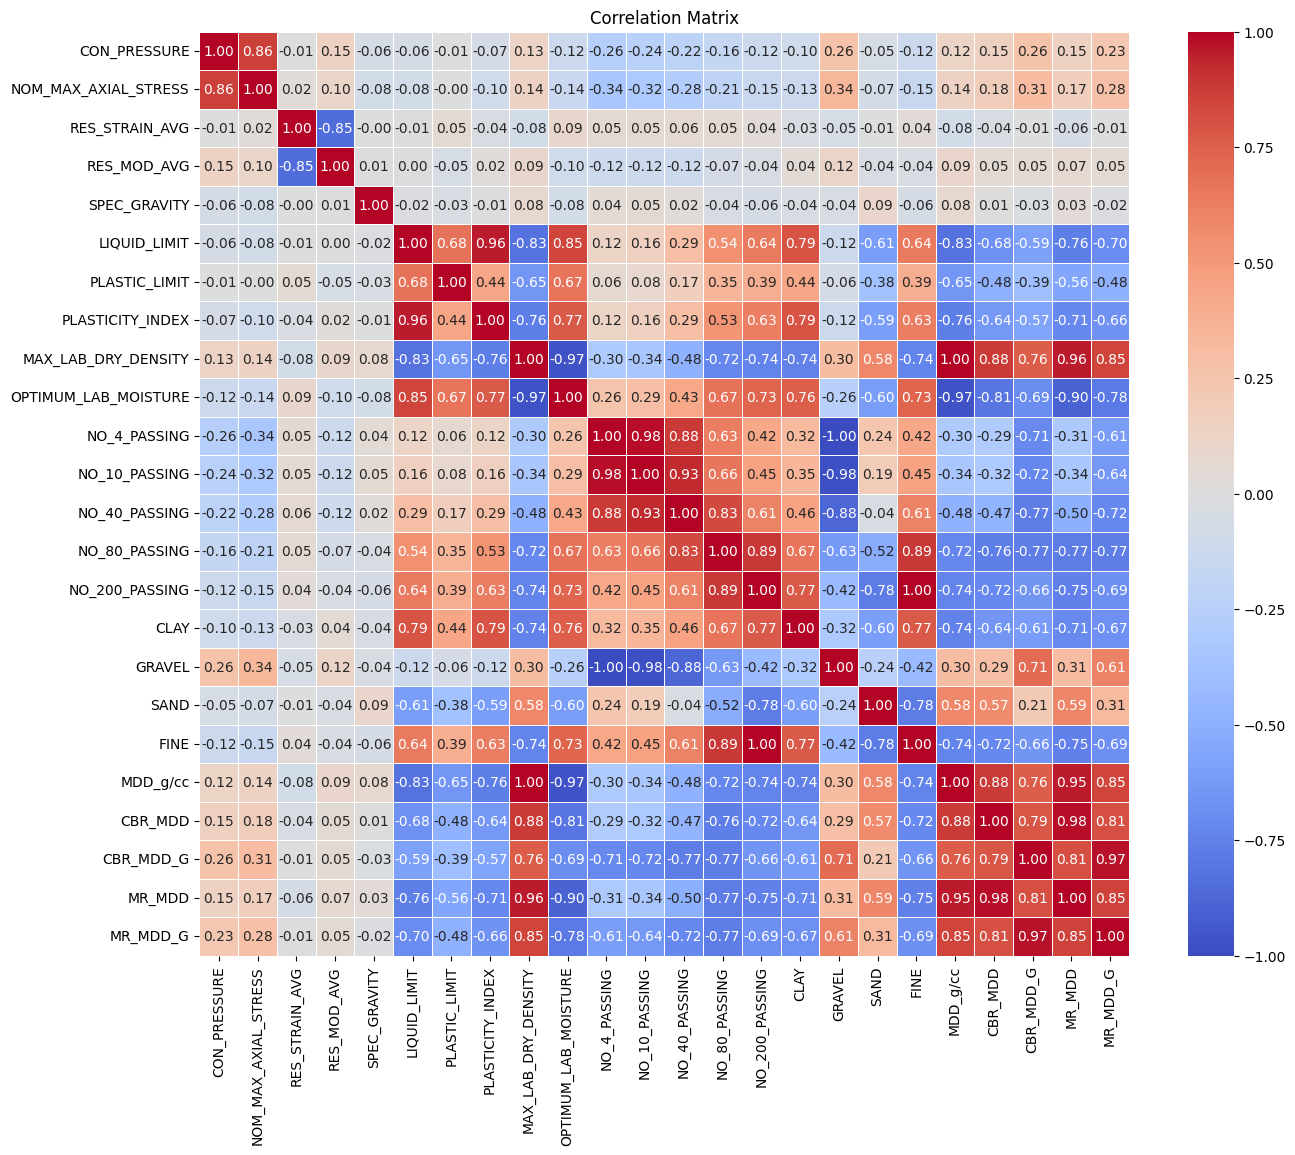

<Figure size 640x480 with 0 Axes>

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = Final_2_df.corr()
print("Correlation Matrix:\n", corr_matrix)

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

save_path = f'/Users/rishithagantyala/Desktop/BTP/DATA/Correlation5.png'
plt.savefig(save_path)